# **Data** **Exploration**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.impute import SimpleImputer
# from sklearn import datasets


In [ ]:
# Load the datasets
# Define the paths to the training and test datasets
path_train="/content/train.csv"
path_test="/content/test.csv"
# path_sample="/content/sample_submission.csv"
# Read the dataset into a DataFrame
# df_train=pd.read_csv(path_train,index_col='Id')
# df_test=pd.read_csv(path_test,index_col='Id')
# df_sample=pd.read_csv(path_sample, index_col='Id')

# # Concatenate df_test and df_sample
# df_test = pd.concat([df_test, df_sample], axis=1)


In [ ]:
# Read the dataset into a DataFrame
df = pd.read_csv(path_train,index_col='Id')
df2 = pd.read_csv(path_test,index_col='Id')


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt 

In [ ]:
df.shape

(1460, 80)

In [ ]:
# Display Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [ ]:
# Summary statistics in training dataset
df.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [ ]:
df.isnull().sum().sum()

7829

In [ ]:
print((len(df[df["YearBuilt"]>df["YearRemodAdd"]])/len(df))*100)
print((len(df2[df2["YearBuilt"]>df2["YearRemodAdd"]])/len(df2))*100)

0.0
0.06854009595613435


In [ ]:
invalid_rows = df2[df2["YearBuilt"] > df2["YearRemodAdd"]]

invalid_rows[["YearBuilt", "YearRemodAdd",'GarageYrBlt']]


YearBuilt  YearRemodAdd  GarageYrBlt
Id                                        
1877       2002          2001       2002.0

In [ ]:
df2.loc[df2["YearBuilt"] > df2["YearRemodAdd"], "YearRemodAdd"] = df2["YearBuilt"]
invalid_rows = df2[df2["YearBuilt"] > df2["YearRemodAdd"]]

invalid_rows[["YearBuilt", "YearRemodAdd",'GarageYrBlt']]


Empty DataFrame
Columns: [YearBuilt, YearRemodAdd, GarageYrBlt]
Index: []

In [ ]:
# df2=df2[df2["YearBuilt"]<=df2["YearRemodAdd"]]

In [ ]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
ratio=100*(null_columns/df.shape[0])
df1=pd.DataFrame({'ratio':ratio,'type':null_columns.dtypes}).T
df1


LotFrontage      Alley MasVnrType MasVnrArea  BsmtQual  BsmtCond  \
ratio   17.739726  93.767123  59.726027   0.547945  2.534247  2.534247   
type        int64      int64      int64      int64     int64     int64   

      BsmtExposure BsmtFinType1 BsmtFinType2 Electrical FireplaceQu  \
ratio      2.60274     2.534247      2.60274   0.068493   47.260274   
type         int64        int64        int64      int64       int64   

      GarageType GarageYrBlt GarageFinish GarageQual GarageCond     PoolQC  \
ratio   5.547945    5.547945     5.547945   5.547945   5.547945  99.520548   
type       int64       int64        int64      int64      int64      int64   

           Fence MiscFeature  
ratio  80.753425    96.30137  
type       int64       int64

In [ ]:
test_null_columns = df2.isnull().sum()
test_null_columns = test_null_columns[test_null_columns > 0]
test_ratio=100*(test_null_columns/df2.shape[0])
df3=pd.DataFrame({'ratio':test_ratio,'type':test_null_columns.dtypes}).T
df3

MSZoning LotFrontage     Alley Utilities Exterior1st Exterior2nd  \
ratio  0.27416   15.558602  92.66621   0.13708     0.06854     0.06854   
type     int64       int64     int64     int64       int64       int64   

      MasVnrType MasVnrArea  BsmtQual  BsmtCond  ... GarageYrBlt GarageFinish  \
ratio  61.274846   1.028101  3.015764  3.084304  ...    5.346127     5.346127   
type       int64      int64     int64     int64  ...       int64        int64   

      GarageCars GarageArea GarageQual GarageCond    PoolQC      Fence  \
ratio    0.06854    0.06854   5.346127   5.346127  99.79438  80.123372   
type       int64      int64      int64      int64     int64      int64   

      MiscFeature SaleType  
ratio   96.504455  0.06854  
type        int64    int64  

[2 rows x 33 columns]

In [ ]:
df.isnull().sum().sum()


7829

In [ ]:
df2.isnull().sum().sum()

7878

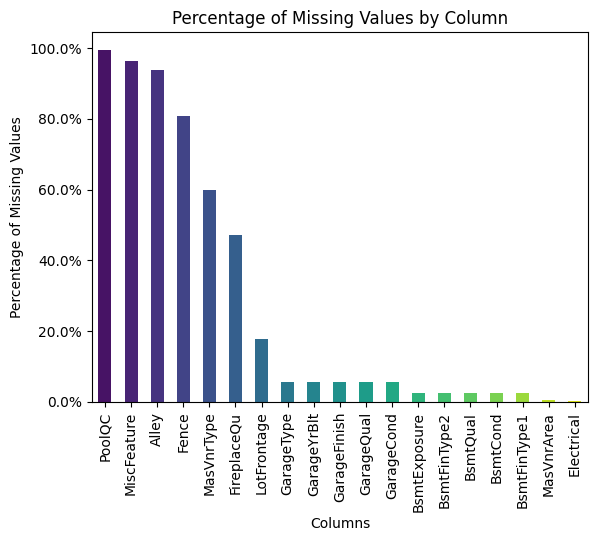

In [ ]:
from matplotlib.ticker import FuncFormatter
null_columns = df.isnull().sum()
null_percentage = (null_columns / len(df)) * 100
null_percentage = null_percentage[null_columns > 0]
mm = null_percentage.sort_values(ascending=False)
colors = sns.color_palette("viridis", len(mm))
ax = mm.plot.bar(color=colors)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
def percentage_formatter(x, pos):
    return f'{x:.1f}%'

ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))


In [ ]:
# Analyze data types and detect missing values
print("Missing Values in Training Dataset:")
df.isnull().sum()


Missing Values in Training Dataset:


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
# Detect outliers using the IQR method for numerical columns in Training data
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("Outliers in Training Dataset:")
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Outliers in {col}: {outliers}")
print("_________________________________")
print("Outliers in Test Dataset:")
for col in [c for c in numerical_columns if c != 'SalePrice']:
  Q1 = df2[col].quantile(0.25)
  Q3 = df2[col].quantile(0.75)
  IQR = Q3 - Q1
  outliers = ((df2[col] < (Q1 - 1.5 * IQR)) | (df2[col] > (Q3 + 1.5 * IQR))).sum()
  print(f"Outliers in {col}: {outliers}")

Outliers in Training Dataset:
Outliers in MSSubClass: 103
Outliers in LotFrontage: 88
Outliers in LotArea: 69
Outliers in OverallQual: 2
Outliers in OverallCond: 125
Outliers in YearBuilt: 7
Outliers in YearRemodAdd: 0
Outliers in MasVnrArea: 96
Outliers in BsmtFinSF1: 7
Outliers in BsmtFinSF2: 167
Outliers in BsmtUnfSF: 29
Outliers in TotalBsmtSF: 61
Outliers in 1stFlrSF: 20
Outliers in 2ndFlrSF: 2
Outliers in LowQualFinSF: 26
Outliers in GrLivArea: 31
Outliers in BsmtFullBath: 1
Outliers in BsmtHalfBath: 82
Outliers in FullBath: 0
Outliers in HalfBath: 0
Outliers in BedroomAbvGr: 35
Outliers in KitchenAbvGr: 68
Outliers in TotRmsAbvGrd: 30
Outliers in Fireplaces: 5
Outliers in GarageYrBlt: 0
Outliers in GarageCars: 5
Outliers in GarageArea: 21
Outliers in WoodDeckSF: 32
Outliers in OpenPorchSF: 77
Outliers in EnclosedPorch: 208
Outliers in 3SsnPorch: 24
Outliers in ScreenPorch: 116
Outliers in PoolArea: 7
Outliers in MiscVal: 52
Outliers in MoSold: 0
Outliers in YrSold: 0
Outliers in

In [ ]:
# Analyze categorical features in Training data
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Features in Training Dataset:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

print("Categorical Features in Test Dataset:")
for col in categorical_columns:
    print(f"{col}: {df2[col].nunique()} unique values")

Categorical Features in Training Dataset:
MSZoning: 5 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 3 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinType2: 6 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
FireplaceQu: 5 unique values
GarageType: 6 unique values
GarageFinish: 3 uniqu

# **Exploratory Data Analysis (EDA)**






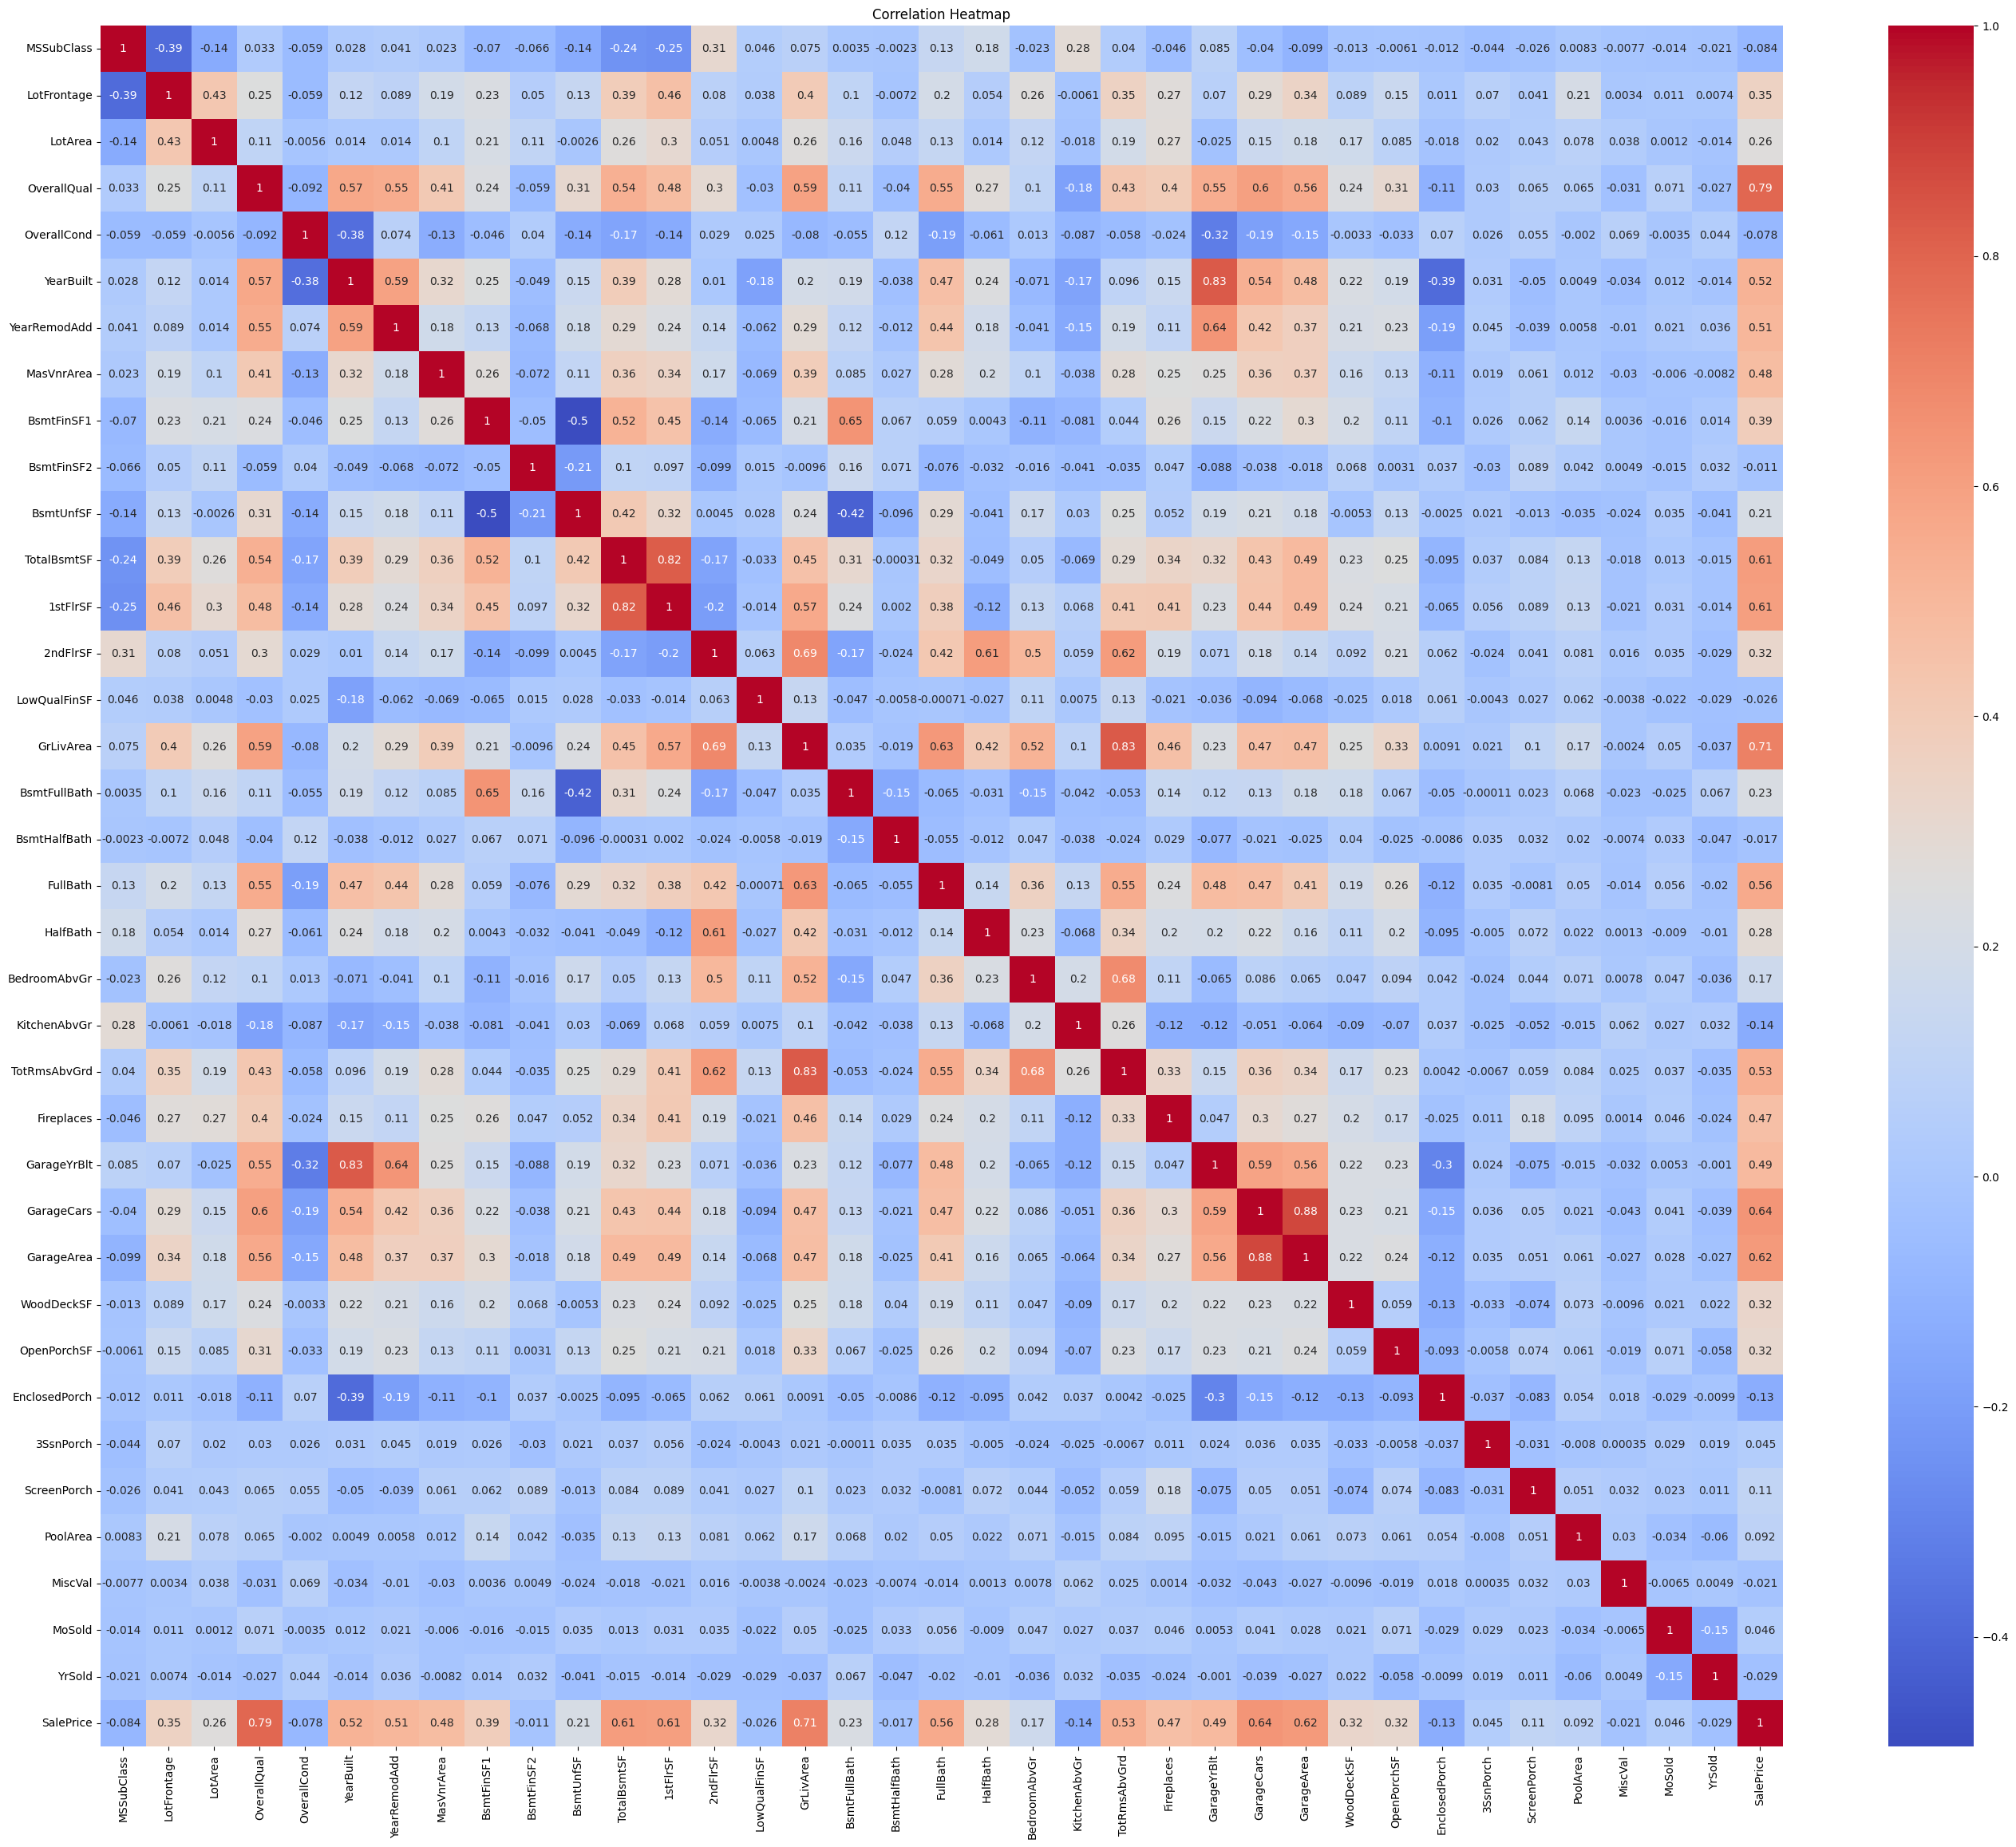

In [ ]:
# Exploratory Data Analysis using Seaborn and Matplotlib
# Correlation Heatmap Training
plt.figure(figsize=(34, 28))
# Select only numerical features for correlation analysis
numerical_data = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')  # Change here
plt.title("Correlation Heatmap")
plt.show()


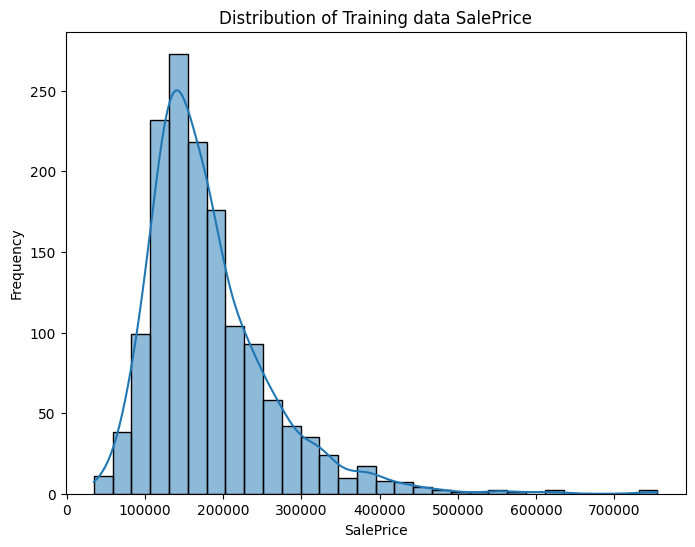

In [ ]:
# Distribution of SalePrice Training
if 'SalePrice' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['SalePrice'], kde=True, bins=30)
    plt.title("Distribution of Training data SalePrice")
    plt.xlabel("SalePrice")
    plt.ylabel("Frequency")
    plt.show()

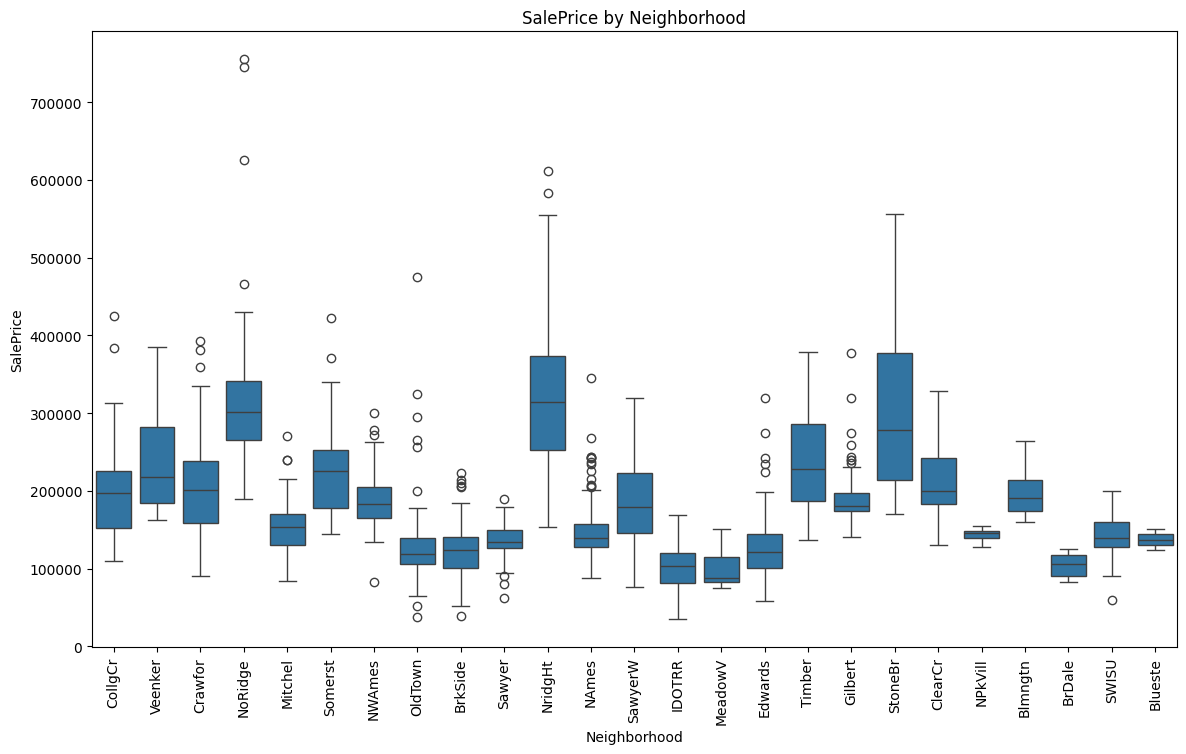

In [ ]:
# Boxplot of SalePrice by Neighborhood Training
if 'Neighborhood' in df.columns and 'SalePrice' in df.columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
    plt.xticks(rotation=90)
    plt.title("SalePrice by Neighborhood")
    plt.show()


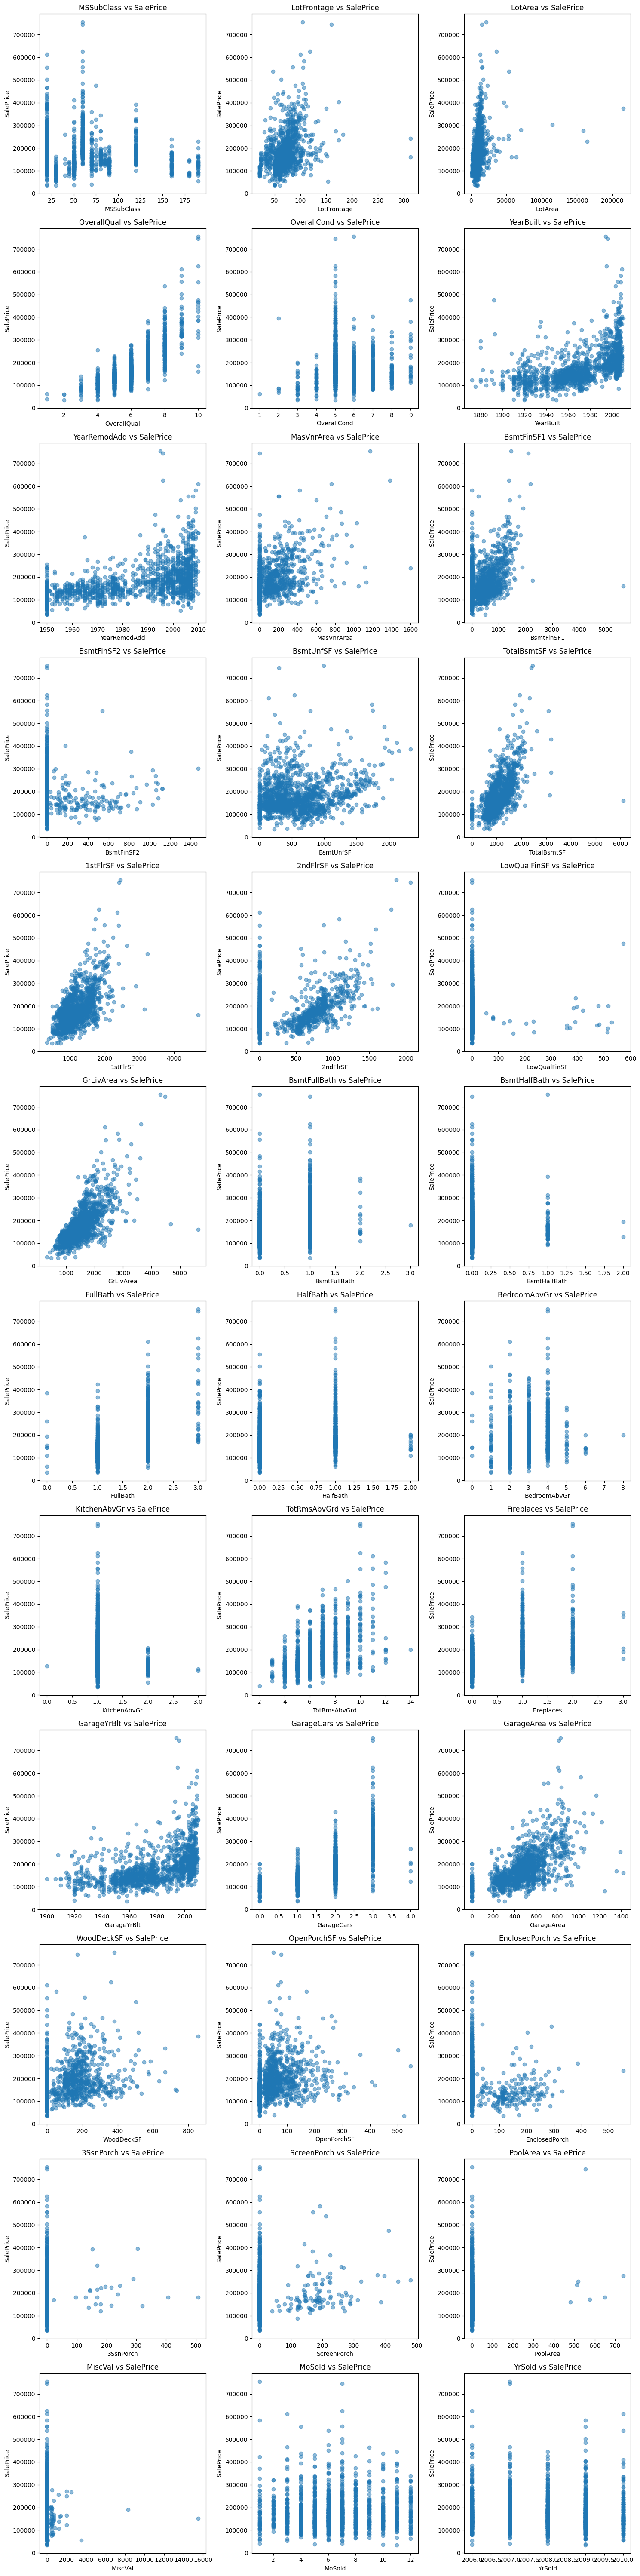

In [ ]:
import math

# Extract Numerical column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'SalePrice' column from numerical columns
numerical_columns = [col for col in numerical_columns if col != 'SalePrice']

# Configure the grid layout (rows and columns)
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(len(numerical_columns) / n_cols)  #Calculate the number of rows

# Set the figure size
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Plot the distributions for each numerical column
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(df[col], df['SalePrice'], alpha=0.5)
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


In [ ]:
# Set the figure size
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Plot the distributions for each numerical column
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


##<code>df[col].value_counts()</code> calculates the frequency of each unique value in the column.






In [ ]:
print("Categorical Features in Training Dataset:")
for col in df.columns:
    if df[col].dtype == 'object':  # Check for categorical columns
        value_counts = df[col].value_counts()
        print(f"Column: {value_counts}")
        print("-" * 20)

print("Categorical Features in Test Dataset:")
for col in df2.columns:
    if df2[col].dtype == 'object':  # Check for categorical columns
        value_counts = df2[col].value_counts()
        print(f"Column: {value_counts}")
        print("-" * 20)

Categorical Features in Training Dataset:
Column: MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
--------------------
Column: Street
Pave    1454
Grvl       6
Name: count, dtype: int64
--------------------
Column: Alley
Grvl    50
Pave    41
Name: count, dtype: int64
--------------------
Column: LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
--------------------
Column: LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
--------------------
Column: Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
--------------------
Column: LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
--------------------
Column: LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
--------------------
Column: Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    10

##generates a bar plot showing the count of each unique value in the column <code>col</code>.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the columns into groups
group_size = 36
for start in range(0, len(categorical_columns), group_size):
    subset = categorical_columns[start:start + group_size]

    # Calculate the number of rows and columns for the current group
    n_cols = 6
    n_rows = (len(subset) + n_cols - 1) // n_cols  # To ensure enough rows for all columns

    # Set the figure size based on the number of rows and columns
    plt.figure(figsize=(n_cols * 6, n_rows * 4))

    # Iterate through the categorical columns and create count plots
    for i, col in enumerate(subset, start=1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)  # Order by frequency
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np

# Identify numerical columns excluding 'SalePrice' in the training data
numerical_cols = df.select_dtypes(include=np.number).columns.drop('SalePrice')

# Fill missing values in the training data (df)
print("Fill missing numerical values for training data:")
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()  # Calculate the median
        df[col] = df[col].fillna(median_val)  # Fill missing values with the median

print(f"Sum of null values in training numerical columns: ")
print(df[numerical_cols].isnull().sum().sum())

# For the test data (df2), ensure numerical columns align with those in the training data
numerical_cols_df2 = [col for col in numerical_cols if col in df2.columns]

# Fill missing values in the testing data (df2)
print("Fill missing numerical values for testing data:")
for col in numerical_cols_df2:
    if df2[col].isnull().any():
        median_val = df[col].median()  # Use the median calculated from training data
        df2[col] = df2[col].fillna(median_val)  # Fill missing values

print(f"Sum of null values in test numerical columns: ")
print(df2[numerical_cols_df2].isnull().sum().sum())


Fill missing numerical values for training data:
Sum of null values in training numerical columns: 
0
Fill missing numerical values for testing data:
Sum of null values in test numerical columns: 
0


#**Data Cleaning**

In [ ]:
# Get the categorical columns that are still in the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values for both training (df) and testing (df2) data
for col in categorical_cols:
    # Handling missing values in df (training data)
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]  # Get the mode (most frequent value)
        df[col] = df[col].fillna(mode_val)

    # Handling missing values in df2 (test data) using the mode from df
    if col in df2.columns and df2[col].isnull().any():
        mode_val = df[col].mode()[0]  # Get the mode (most frequent value) from df
        df2[col] = df2[col].fillna(mode_val)

# Optionally, print the sum of missing values after filling for both datasets
print(f"Missing values in training data (df) after filling: ")
print(df[categorical_cols].isnull().sum())

print(f"Missing values in testing data (df2) after filling: ")
print(df2[categorical_cols].isnull().sum())


Missing values in training data (df) after filling: 
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64
Missing values in testing data (df2) after filling: 
MSZoning         0
Street           0
Alley            0
LotShap

Number of Features:  28


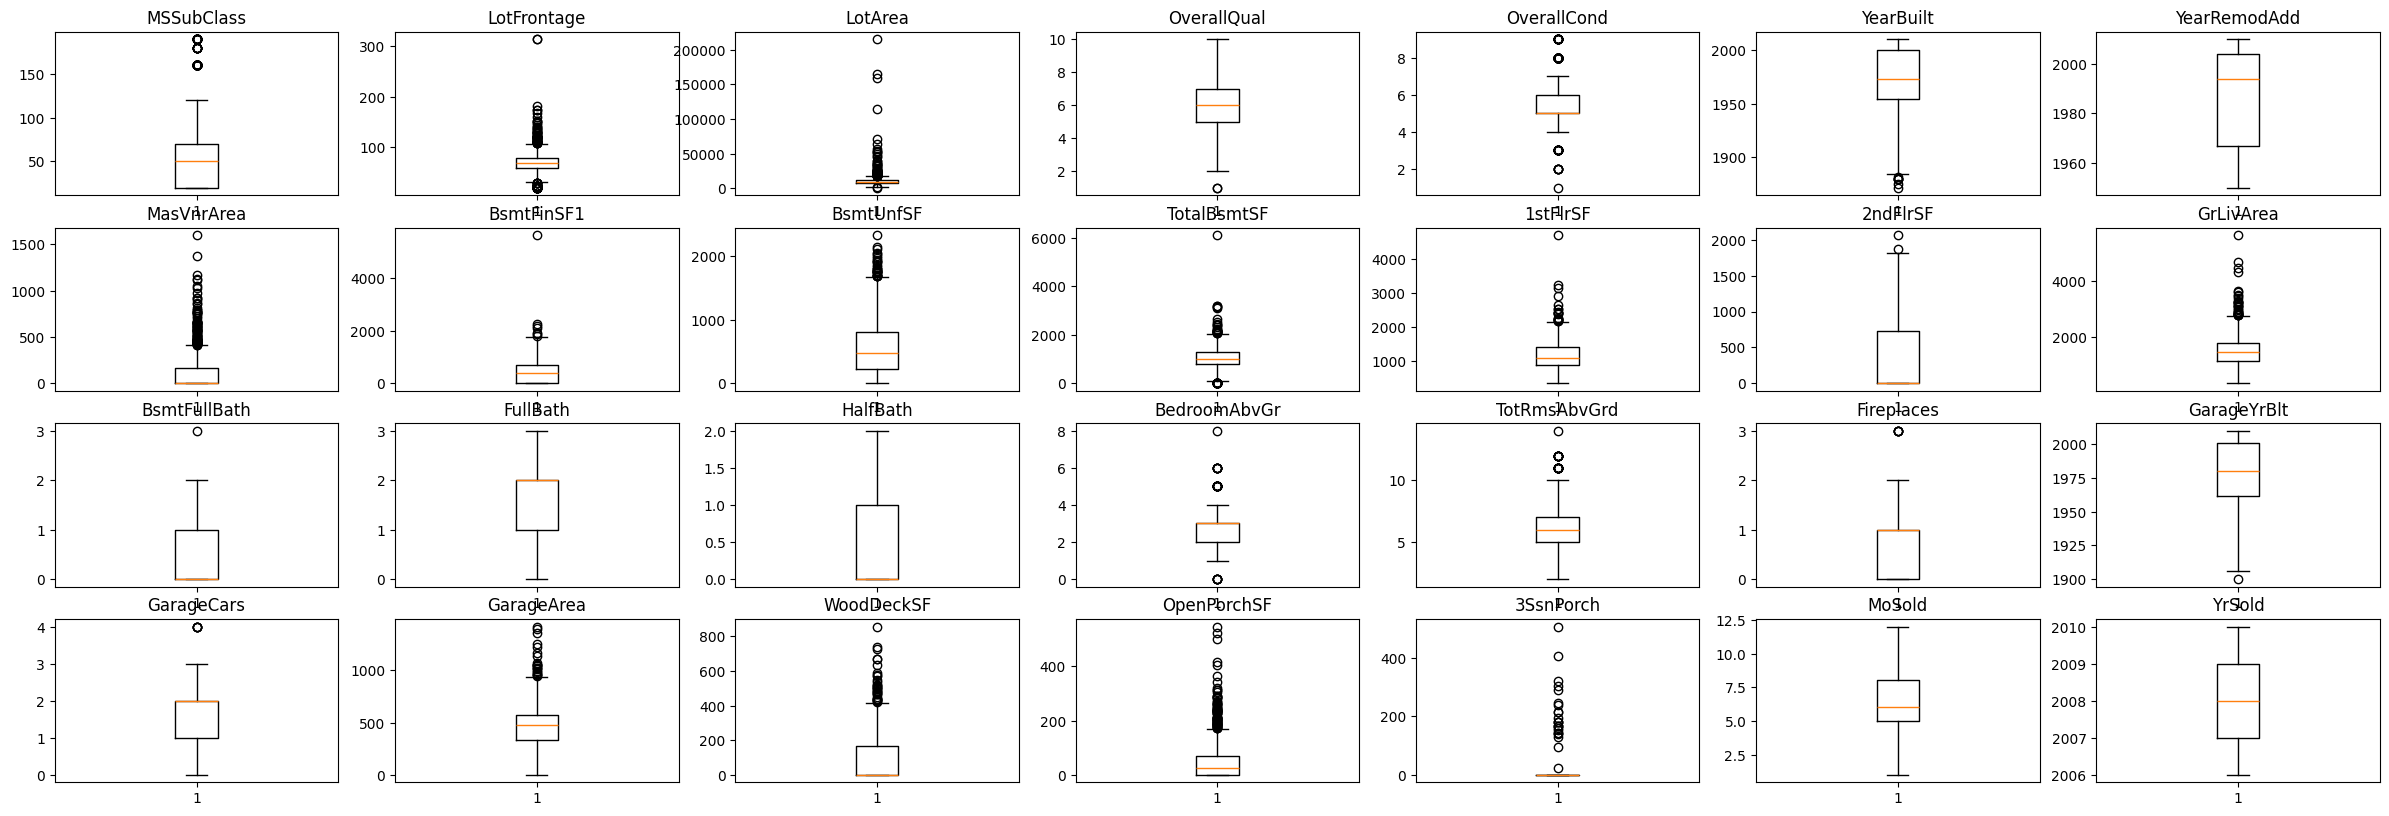

In [ ]:
col3 = df.select_dtypes('number').columns.drop(['SalePrice','ScreenPorch','PoolArea','MiscVal','EnclosedPorch','KitchenAbvGr',
    'BsmtHalfBath','LowQualFinSF','BsmtFinSF2'])

print("Number of Features: ", len(col3))

plt.figure(figsize=(30,25))
for i , col in enumerate(col3):
    plt.subplot(10,7,i+1)
    plt.title(col)
    plt.boxplot(df[col])

In [ ]:

for col in col3:
    # Calculate statistical values for each column
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    # Replace outliers in df
    df[col] = df[col].clip(lower=low, upper=up)

# Handling outliers in df2
col2 = df2.select_dtypes('number').columns.drop(['ScreenPorch','PoolArea','MiscVal','EnclosedPorch','KitchenAbvGr',
    'BsmtHalfBath','LowQualFinSF','BsmtFinSF2'])

for col in col2:
    if col in df.columns:
        # Calculate the same boundaries from df for each column
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        up = q3 + 1.5 * iqr
        # Replace outliers in df2 using the same boundaries
        df2[col] = df2[col].clip(lower=low, upper=up)


##----------------------------------------------------------------------

In [ ]:
# Number of Duplicated Rows
df.duplicated().sum()

0

In [ ]:
df.shape

(1460, 80)

In [ ]:
# Calculate the number of null values in each categorical column
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
# Recalculate numerical_cols to get the current numerical columns in df
numerical_cols = df.select_dtypes(include=np.number).columns

# Now you can use numerical_cols to access the columns in df
df[numerical_cols].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
df=df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
df2=df2.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
df2.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1461          20       RH         80.0  11622.0   Pave      Reg         Lvl   
1462          20       RL         81.0  14267.0   Pave      IR1         Lvl   
1463          60       RL         74.0  13830.0   Pave      IR1         Lvl   
1464          60       RL         78.0   9978.0   Pave      IR1         Lvl   
1465         120       RL         43.0   5005.0   Pave      IR1         HLS   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
Id                                  ...                                       
1461    AllPub    Inside       Gtl  ...           0             0         0   
1462    AllPub    Corner       Gtl  ...          36             0         0   
1463    AllPub    Inside       Gtl  ...          34             0         0   
1464    AllPub    Inside       Gtl  ...          36             0         0   
1465    AllPub    Inside       Gtl  ...          82             0         0   

     ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
Id                                                                          
1461         120        0        0       6    2010        WD        Normal  
1462           0        0    12500       6    2010        WD        Normal  
1463           0        0        0       3    2010        WD        Normal  
1464           0        0        0       6    2010        WD        Normal  
1465         144        0        0       1    2010        WD        Normal  

[5 rows x 72 columns]

In [ ]:
df['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

# **Feature Engineering**

In [ ]:
df['houseage'] = df['YrSold'] - df['YearBuilt']
df2['houseage'] = df2['YrSold'] - df2['YearBuilt']

In [ ]:
df['houseremodelage'] = df['YrSold'] - df['YearRemodAdd']
df2['houseremodelage'] = df2['YrSold'] - df2['YearRemodAdd']

In [ ]:
df['totalsf'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['BsmtFinSF1'] +df['BsmtFinSF2']
df2['totalsf'] = df2['1stFlrSF'] + df2['2ndFlrSF'] + df2['BsmtFinSF1'] + df2['BsmtFinSF2']

In [ ]:
df['totalarea'] = df['GrLivArea'] + df['TotalBsmtSF']
df2['totalarea'] = df2['GrLivArea'] + df2['TotalBsmtSF']

In [ ]:
df['totalbaths'] = df['BsmtFullBath'] + df['FullBath'] + 0.5 * (df['BsmtHalfBath'] + df['HalfBath'])
df2['totalbaths'] = df2['BsmtFullBath'] + df2['FullBath'] + 0.5 * (df2['BsmtHalfBath'] + df2['HalfBath'])

In [ ]:
df['totalporchsf'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
df2['totalporchsf'] = df2['OpenPorchSF'] + df2['3SsnPorch'] + df2['EnclosedPorch'] + df2['ScreenPorch'] + df2['WoodDeckSF']

In [ ]:
df = df.drop(columns=['GarageCars','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
df2 = df2.drop(columns=['GarageCars','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

In [ ]:
df2

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1461          20       RH         80.0  11622.0   Pave      Reg         Lvl   
1462          20       RL         81.0  14267.0   Pave      IR1         Lvl   
1463          60       RL         74.0  13830.0   Pave      IR1         Lvl   
1464          60       RL         78.0   9978.0   Pave      IR1         Lvl   
1465         120       RL         43.0   5005.0   Pave      IR1         HLS   
...          ...      ...          ...      ...    ...      ...         ...   
2915         145       RM         31.5   1936.0   Pave      Reg         Lvl   
2916         145       RM         31.5   1894.0   Pave      Reg         Lvl   
2917          20       RL        107.5  17673.5   Pave      Reg         Lvl   
2918          85       RL         62.0  10441.0   Pave      Reg         Lvl   
2919          60       RL         74.0   9627.0   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... MiscVal MoSold SaleType SaleCondition  \
Id                                  ...                                         
1461    AllPub    Inside       Gtl  ...       0      6       WD        Normal   
1462    AllPub    Corner       Gtl  ...   12500      6       WD        Normal   
1463    AllPub    Inside       Gtl  ...       0      3       WD        Normal   
1464    AllPub    Inside       Gtl  ...       0      6       WD        Normal   
1465    AllPub    Inside       Gtl  ...       0      1       WD        Normal   
...        ...       ...       ...  ...     ...    ...      ...           ...   
2915    AllPub    Inside       Gtl  ...       0      6       WD        Normal   
2916    AllPub    Inside       Gtl  ...       0      4       WD       Abnorml   
2917    AllPub    Inside       Gtl  ...       0      9       WD       Abnorml   
2918    AllPub    Inside       Gtl  ...     700      7       WD        Normal   
2919    AllPub    Inside       Mod  ...       0     11       WD        Normal   

     houseage  houseremodelage  totalsf totalarea totalbaths totalporchsf  
Id                                                                         
1461       49               49   1508.0    1778.0        1.0          260  
1462       52               52   2252.0    2658.0        1.5          429  
1463       13               12   2420.0    2557.0        2.5          246  
1464       12               12   2206.0    2530.0        2.5          396  
1465       18               18   1543.0    2560.0        2.0          226  
...       ...              ...      ...       ...        ...          ...  
2915       36               36   1092.0    1638.0        1.5            0  
2916       36               36   1344.0    1638.0        1.5           24  
2917       46               10   2448.0    2448.0        2.0          420  
2918       14               14   1307.0    1882.0        1.5          112  
2919       13               12   2758.0    2996.0        2.5          238  

[1459 rows x 59 columns]

#**Data Formatter & Encoder**

In [ ]:
df.select_dtypes(include=['number']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'houseage', 'houseremodelage',
       'totalsf', 'totalarea', 'totalbaths', 'totalporchsf'],
      dtype='object')

In [ ]:
# Convert numeric-looking columns from object type to appropriate numeric types
numeric_columns = df.select_dtypes(include=['object']).columns

for col in numeric_columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        pass  # Ignore columns that cannot be converted

for col in numeric_columns:
    try:
        df2[col] = df2[col].astype(float)
    except ValueError:
        pass  # Ignore columns that cannot be converted

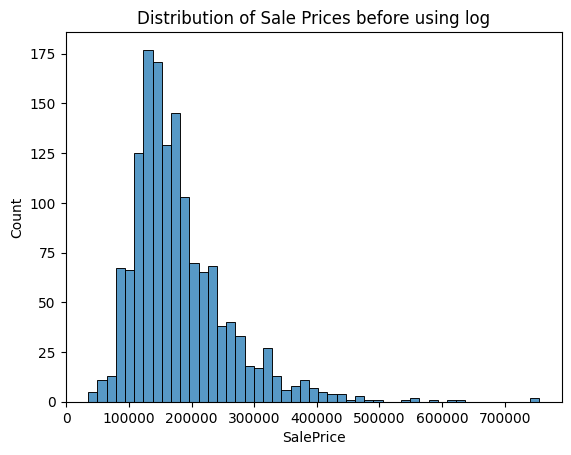

In [ ]:

sns.histplot(df, x='SalePrice')
plt.title('Distribution of Sale Prices before using log')  # Add title
plt.show()


In [ ]:
df['SalePrice'] = np.log1p(df['SalePrice'])


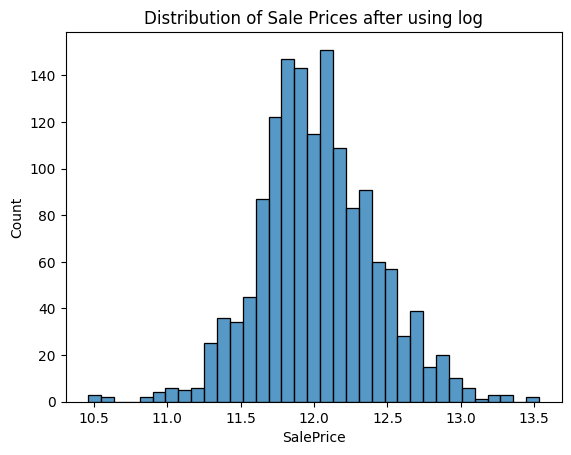

In [ ]:

sns.histplot(df, x='SalePrice')
plt.title('Distribution of Sale Prices after using log')  # Add title
plt.show()

standardization----





In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns excluding 'SalePrice'
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

# Initialize the StandardScaler
scalar = StandardScaler()

# Fit the scaler on df and transform the selected columns in df
df[num_cols] = scalar.fit_transform(df[num_cols])

# Now apply the same transformation to df2 using the same scaler
df2[num_cols] = scalar.transform(df2[num_cols])


In [ ]:
df=pd.DataFrame(df)
df2=pd.DataFrame(df2)

In [ ]:
# Create the ordinal encoder
ode_cols =df.select_dtypes(include=['object']).columns

ordinal_encoder = OrdinalEncoder()

# Fit and transform the specified columns
df[ode_cols] = ordinal_encoder.fit_transform(df[ode_cols])
df2[ode_cols] = ordinal_encoder.fit_transform(df2[ode_cols])

# Display the updated DataFrame (optional)
df.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
Id                                                                  
1     0.131067       3.0    -0.237456 -0.333244     1.0       3.0   
2    -0.935733       3.0     0.633321 -0.013189     1.0       3.0   
3     0.131067       3.0    -0.063300  0.446022     1.0       0.0   
4     0.397766       3.0    -0.527714 -0.027104     1.0       0.0   
5     0.131067       3.0     0.865528  1.283733     1.0       0.0   

    LandContour  Utilities  LotConfig  LandSlope  ...    MoSold  SaleType  \
Id                                                ...                       
1           3.0        0.0        4.0        0.0  ... -1.599111       8.0   
2           3.0        0.0        2.0        0.0  ... -0.489110       8.0   
3           3.0        0.0        4.0        0.0  ...  0.990891       8.0   
4           3.0        0.0        0.0        0.0  ... -1.599111       8.0   
5           3.0        0.0        2.0        0.0  ...  2.100892       8.0   

    SaleCondition  SalePrice  houseage  houseremodelage   totalsf  totalarea  \
Id                                                                             
1             4.0  12.247699 -1.045496        -0.869941  0.591102   0.016273   
2             4.0  12.109016 -0.182997         0.390141  0.346688  -0.040639   
3             4.0  12.317171 -0.979149        -0.821476  0.391127   0.205979   
4             0.0  11.849405  1.807384         0.632464 -0.079649  -0.109746   
5             4.0  12.429220 -0.945976        -0.724547  1.197971   1.069140   

    totalbaths  totalporchsf  
Id                            
1     1.645932     -0.775568  
2     0.369745      0.888992  
3     1.645932     -0.909013  
4    -0.268349      0.952203  
5     1.645932      0.734476  

[5 rows x 60 columns]

In [ ]:
df2

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
Id                                                                    
1461   -0.935733       2.0     0.633321  0.549553     1.0       3.0   
1462   -0.935733       3.0     0.691373  1.285681     1.0       0.0   
1463    0.131067       3.0     0.285010  1.164060     1.0       0.0   
1464    0.131067       3.0     0.517217  0.092012     1.0       0.0   
1465    1.731266       3.0    -1.514594 -1.292020     1.0       0.0   
...          ...       ...          ...       ...     ...       ...   
2915    2.398015       4.0    -2.182189 -2.146151     1.0       3.0   
2916    2.398015       4.0    -2.182189 -2.157840     1.0       3.0   
2917   -0.935733       3.0     2.229744  2.233741     1.0       3.0   
2918    0.797816       3.0    -0.411611  0.220870     1.0       3.0   
2919    0.131067       3.0     0.285010 -0.005674     1.0       3.0   

      LandContour  Utilities  LotConfig  LandSlope  ...    MiscVal    MoSold  \
Id                                                  ...                        
1461          3.0        0.0        4.0        0.0  ...  -0.087688 -0.119110   
1462          3.0        0.0        0.0        0.0  ...  25.116309 -0.119110   
1463          3.0        0.0        4.0        0.0  ...  -0.087688 -1.229111   
1464          3.0        0.0        4.0        0.0  ...  -0.087688 -0.119110   
1465          1.0        0.0        4.0        0.0  ...  -0.087688 -1.969111   
...           ...        ...        ...        ...  ...        ...       ...   
2915          3.0        0.0        4.0        0.0  ...  -0.087688 -0.119110   
2916          3.0        0.0        4.0        0.0  ...  -0.087688 -0.859110   
2917          3.0        0.0        4.0        0.0  ...  -0.087688  0.990891   
2918          3.0        0.0        4.0        0.0  ...   1.323736  0.250891   
2919          3.0        0.0        4.0        1.0  ...  -0.087688  1.730892   

      SaleType  SaleCondition  houseage  houseremodelage   totalsf  totalarea  \
Id                                                                              
1461       8.0            4.0  0.414117         1.262505 -0.669853  -1.051499   
1462       8.0            4.0  0.513637         1.407899  0.363352   0.140937   
1463       8.0            4.0 -0.780111        -0.530688  0.596657   0.004078   
1464       8.0            4.0 -0.813284        -0.530688  0.299471  -0.032508   
1465       8.0            4.0 -0.614246        -0.239900 -0.621248   0.008143   
...        ...            ...       ...              ...       ...        ...   
2915       8.0            4.0 -0.017132         0.632464 -1.247560  -1.241205   
2916       8.0            0.0 -0.017132         0.632464 -0.897603  -1.241205   
2917       8.0            0.0  0.314598        -0.627618  0.635541  -0.143622   
2918       8.0            4.0 -0.746938        -0.433759 -0.948985  -0.910575   
2919       8.0            4.0 -0.780111        -0.530688  1.066043   0.598941   

      totalbaths  totalporchsf  
Id                              
1461   -1.544536      0.622100  
1462   -0.906443      1.809065  
1463    0.369745      0.523772  
1464    0.369745      1.577290  
1465   -0.268349      0.383303  
...          ...           ...  
2915   -0.906443     -1.203999  
2916   -0.906443     -1.035436  
2917   -0.268349      1.745853  
2918   -0.906443     -0.417371  
2919    0.369745      0.467584  

[1459 rows x 59 columns]

In [ ]:
df2.value_counts()

MSSubClass  MSZoning  LotFrontage  LotArea    Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtUnfSF  Heating  HeatingQC  CentralAir  Electrical  LowQualFinSF  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageArea  GarageQual  PavedDrive  PoolArea   MiscVal    MoSold     SaleType  SaleCondition  houseage   houseremodelage  totalsf    totalarea  totalbaths  totalporchsf
 2.398015   4.0        1.794356    -0.167650  1.0     3.0       3.0          0.0        4.0        0.0        17.0          2.0         2.0         1.0       4.0         -0.798780    -2.121201    1.0        0.0       7.0          8.0          1.0         -0.667353   3.0        1.0        0.0         3.0       3.0       2.0           5.0            0.640052  2.0      1.0        0.0         1.0         -0.120242      1.512385      4.328579     1.0           2.278680     6.0         -0.957043   2.0          1.0         2.0           -2.273390   3.0         0.0         -0.068692  -0.087688  -0.119110  8.0       0.0             2.105942   1.795616         0.368907   0.734445  -0.268349   -0.951154       1
-0.935733   0.0       -0.237456    -0.857857  1.0     3.0       3.0          0.0        0.0        0.0        9.0           2.0         2.0         0.0       2.0         -1.524492     0.473866    1.0        0.0       7.0          8.0          1.0         -0.667353   3.0        4.0        1.0         3.0       3.0       3.0           2.0           -1.060745  0.0      2.0        1.0         0.0         -0.120242      0.195307     -0.211454     3.0          -0.316385     6.0         -0.957043   2.0          5.0         2.0            1.204287   3.0         2.0         -0.068692  -0.087688   0.620891  8.0       0.0             0.447291   0.196282         0.068944  -0.552844  -0.268349   -0.010011       1
            1.0       -0.701870     0.892151  1.0     0.0       3.0          0.0        4.0        0.0        21.0          2.0         2.0         0.0       2.0          1.378355    -0.564161    1.0        0.0       5.0          5.0          1.0         -0.667353   2.0        4.0        2.0         0.0       2.0       3.0           2.0            0.107104  0.0      0.0        1.0         3.0         -0.120242     -2.438851     -0.211454     2.0          -0.316385     6.0          0.608540   2.0          1.0         1.0            1.841861   3.0         2.0         -0.068692  -0.087688  -0.859110  6.0       5.0            -1.211361  -1.112264         0.638318   0.685663   0.369745    1.113742       1
                      -0.527714    -0.686697  1.0     0.0       3.0          0.0        4.0        0.0        21.0          2.0         2.0         0.0       2.0          1.378355    -0.564161    1.0        0.0       5.0          5.0          1.0         -0.667353   2.0        4.0        2.0         2.0       3.0       3.0           5.0            2.326946  0.0      0.0        1.0         3.0         -0.120242      0.195307     -0.211454     2.0          -0.316385     6.0          0.608540   4.0          1.0         1.0            0.450790   3.0         2.0         -0.068692  -0.087688   0.990891  8.0       4.0            -1.045496  -0.918406        -0.586530   0.788646  -0.268349   -0.010011       1
                      -0.411611    -0.597638  1.0     3.0       3.0          0.0        4.0        0.0        21.0          2.0         2.0         0.0       2.0          0.652644    -0.564161    1.0        0.0       5.0          5.0          2.0          0.900143   2.0        4.0        2.0         2.0       3.0       3.0           2.0           -0.574141  0.0      0.0        1.0         3.0         -0.120242     -1.121772     -0.211454     2.0      

In [ ]:
df.shape

(1460, 60)

In [ ]:
df = df.dropna()
df2 = df2.dropna()

In [ ]:
df

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
Id                                                                    
1       0.131067       3.0    -0.237456 -0.333244     1.0       3.0   
2      -0.935733       3.0     0.633321 -0.013189     1.0       3.0   
3       0.131067       3.0    -0.063300  0.446022     1.0       0.0   
4       0.397766       3.0    -0.527714 -0.027104     1.0       0.0   
5       0.131067       3.0     0.865528  1.283733     1.0       0.0   
...          ...       ...          ...       ...     ...       ...   
1456    0.131067       3.0    -0.411611 -0.481583     1.0       3.0   
1457   -0.935733       3.0     0.923580  0.981767     1.0       3.0   
1458    0.397766       3.0    -0.179404 -0.168485     1.0       3.0   
1459   -0.935733       3.0    -0.063300  0.019374     1.0       3.0   
1460   -0.935733       3.0     0.343062  0.080602     1.0       3.0   

      LandContour  Utilities  LotConfig  LandSlope  ...    MoSold  SaleType  \
Id                                                  ...                       
1             3.0        0.0        4.0        0.0  ... -1.599111       8.0   
2             3.0        0.0        2.0        0.0  ... -0.489110       8.0   
3             3.0        0.0        4.0        0.0  ...  0.990891       8.0   
4             3.0        0.0        0.0        0.0  ... -1.599111       8.0   
5             3.0        0.0        2.0        0.0  ...  2.100892       8.0   
...           ...        ...        ...        ...  ...       ...       ...   
1456          3.0        0.0        4.0        0.0  ...  0.620891       8.0   
1457          3.0        0.0        4.0        0.0  ... -1.599111       8.0   
1458          3.0        0.0        4.0        0.0  ... -0.489110       8.0   
1459          3.0        0.0        4.0        0.0  ... -0.859110       8.0   
1460          3.0        0.0        4.0        0.0  ... -0.119110       8.0   

      SaleCondition  SalePrice  houseage  houseremodelage   totalsf  \
Id                                                                    
1               4.0  12.247699 -1.045496        -0.869941  0.591102   
2               4.0  12.109016 -0.182997         0.390141  0.346688   
3               4.0  12.317171 -0.979149        -0.821476  0.391127   
4               0.0  11.849405  1.807384         0.632464 -0.079649   
5               4.0  12.429220 -0.945976        -0.724547  1.197971   
...             ...        ...       ...              ...       ...   
1456            4.0  12.072547 -0.945976        -0.773012 -0.476822   
1457            4.0  12.254868 -0.149824        -0.046041  1.438219   
1458            4.0  12.493133  1.077578        -0.918406  0.867457   
1459            4.0  11.864469  0.779021        -0.433759  0.230035   
1460            4.0  11.901590  0.215079         0.971717  0.535553   

      totalarea  totalbaths  totalporchsf  
Id                                         
1      0.016273    1.645932     -0.775568  
2     -0.040639    0.369745      0.888992  
3      0.205979    1.645932     -0.909013  
4     -0.109746   -0.268349      0.952203  
5      1.069140    1.645932      0.734476  
...         ...         ...           ...  
1456   0.062345    0.369745     -0.923060  
1457   1.437711    1.007838      1.247188  
1458   1.271041   -0.268349     -0.782591  
1459  -0.539294   -0.268349      2.153214  
1460  -0.056899    0.369745      2.223449  

[1460 rows x 60 columns]

In [ ]:
# Calculate correlation matrix for df
correlation = df.corr()

# Find columns with low correlation (< 0.04) with 'SalePrice'
low_corr_features = correlation['SalePrice'][correlation['SalePrice'].abs() < 0.04].index

# Drop low correlation features from df
df = df.drop(columns=low_corr_features)

# Apply the same transformation to df2 (drop the same low correlation features)
df2 = df2.drop(columns=low_corr_features)

# Print the low correlation features
print("Low correlation features:", low_corr_features)


Low correlation features: Index(['LandContour', 'Utilities', 'LandSlope', 'Condition2', 'LowQualFinSF',
       'MiscVal', 'SaleType'],
      dtype='object')


In [ ]:
df

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
Id                                                                    
1       0.131067       3.0    -0.237456 -0.333244     1.0       3.0   
2      -0.935733       3.0     0.633321 -0.013189     1.0       3.0   
3       0.131067       3.0    -0.063300  0.446022     1.0       0.0   
4       0.397766       3.0    -0.527714 -0.027104     1.0       0.0   
5       0.131067       3.0     0.865528  1.283733     1.0       0.0   
...          ...       ...          ...       ...     ...       ...   
1456    0.131067       3.0    -0.411611 -0.481583     1.0       3.0   
1457   -0.935733       3.0     0.923580  0.981767     1.0       3.0   
1458    0.397766       3.0    -0.179404 -0.168485     1.0       3.0   
1459   -0.935733       3.0    -0.063300  0.019374     1.0       3.0   
1460   -0.935733       3.0     0.343062  0.080602     1.0       3.0   

      LotConfig  Neighborhood  Condition1  BldgType  ...  PoolArea    MoSold  \
Id                                                   ...                       
1           4.0           5.0         2.0       0.0  ... -0.068692 -1.599111   
2           2.0          24.0         1.0       0.0  ... -0.068692 -0.489110   
3           4.0           5.0         2.0       0.0  ... -0.068692  0.990891   
4           0.0           6.0         2.0       0.0  ... -0.068692 -1.599111   
5           2.0          15.0         2.0       0.0  ... -0.068692  2.100892   
...         ...           ...         ...       ...  ...       ...       ...   
1456        4.0           8.0         2.0       0.0  ... -0.068692  0.620891   
1457        4.0          14.0         2.0       0.0  ... -0.068692 -1.599111   
1458        4.0           6.0         2.0       0.0  ... -0.068692 -0.489110   
1459        4.0          12.0         2.0       0.0  ... -0.068692 -0.859110   
1460        4.0           7.0         2.0       0.0  ... -0.068692 -0.119110   

      SaleCondition  SalePrice  houseage  houseremodelage   totalsf  \
Id                                                                    
1               4.0  12.247699 -1.045496        -0.869941  0.591102   
2               4.0  12.109016 -0.182997         0.390141  0.346688   
3               4.0  12.317171 -0.979149        -0.821476  0.391127   
4               0.0  11.849405  1.807384         0.632464 -0.079649   
5               4.0  12.429220 -0.945976        -0.724547  1.197971   
...             ...        ...       ...              ...       ...   
1456            4.0  12.072547 -0.945976        -0.773012 -0.476822   
1457            4.0  12.254868 -0.149824        -0.046041  1.438219   
1458            4.0  12.493133  1.077578        -0.918406  0.867457   
1459            4.0  11.864469  0.779021        -0.433759  0.230035   
1460            4.0  11.901590  0.215079         0.971717  0.535553   

      totalarea  totalbaths  totalporchsf  
Id                                         
1      0.016273    1.645932     -0.775568  
2     -0.040639    0.369745      0.888992  
3      0.205979    1.645932     -0.909013  
4     -0.109746   -0.268349      0.952203  
5      1.069140    1.645932      0.734476  
...         ...         ...           ...  
1456   0.062345    0.369745     -0.923060  
1457   1.437711    1.007838      1.247188  
1458   1.271041   -0.268349     -0.782591  
1459  -0.539294   -0.268349      2.153214  
1460  -0.056899    0.369745      2.223449  

[1460 rows x 53 columns]

In [ ]:
df2

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
Id                                                                    
1461   -0.935733       2.0     0.633321  0.549553     1.0       3.0   
1462   -0.935733       3.0     0.691373  1.285681     1.0       0.0   
1463    0.131067       3.0     0.285010  1.164060     1.0       0.0   
1464    0.131067       3.0     0.517217  0.092012     1.0       0.0   
1465    1.731266       3.0    -1.514594 -1.292020     1.0       0.0   
...          ...       ...          ...       ...     ...       ...   
2915    2.398015       4.0    -2.182189 -2.146151     1.0       3.0   
2916    2.398015       4.0    -2.182189 -2.157840     1.0       3.0   
2917   -0.935733       3.0     2.229744  2.233741     1.0       3.0   
2918    0.797816       3.0    -0.411611  0.220870     1.0       3.0   
2919    0.131067       3.0     0.285010 -0.005674     1.0       3.0   

      LotConfig  Neighborhood  Condition1  BldgType  ...  PavedDrive  \
Id                                                   ...               
1461        4.0          12.0         1.0       0.0  ...         2.0   
1462        0.0          12.0         2.0       0.0  ...         2.0   
1463        4.0           8.0         2.0       0.0  ...         2.0   
1464        4.0           8.0         2.0       0.0  ...         2.0   
1465        4.0          22.0         2.0       4.0  ...         2.0   
...         ...           ...         ...       ...  ...         ...   
2915        4.0          10.0         2.0       3.0  ...         2.0   
2916        4.0          10.0         2.0       4.0  ...         2.0   
2917        4.0          11.0         2.0       0.0  ...         2.0   
2918        4.0          11.0         2.0       0.0  ...         2.0   
2919        4.0          11.0         2.0       0.0  ...         2.0   

      PoolArea    MoSold  SaleCondition  houseage  houseremodelage   totalsf  \
Id                                                                             
1461 -0.068692 -0.119110            4.0  0.414117         1.262505 -0.669853   
1462 -0.068692 -0.119110            4.0  0.513637         1.407899  0.363352   
1463 -0.068692 -1.229111            4.0 -0.780111        -0.530688  0.596657   
1464 -0.068692 -0.119110            4.0 -0.813284        -0.530688  0.299471   
1465 -0.068692 -1.969111            4.0 -0.614246        -0.239900 -0.621248   
...        ...       ...            ...       ...              ...       ...   
2915 -0.068692 -0.119110            4.0 -0.017132         0.632464 -1.247560   
2916 -0.068692 -0.859110            0.0 -0.017132         0.632464 -0.897603   
2917 -0.068692  0.990891            0.0  0.314598        -0.627618  0.635541   
2918 -0.068692  0.250891            4.0 -0.746938        -0.433759 -0.948985   
2919 -0.068692  1.730892            4.0 -0.780111        -0.530688  1.066043   

      totalarea  totalbaths  totalporchsf  
Id                                         
1461  -1.051499   -1.544536      0.622100  
1462   0.140937   -0.906443      1.809065  
1463   0.004078    0.369745      0.523772  
1464  -0.032508    0.369745      1.577290  
1465   0.008143   -0.268349      0.383303  
...         ...         ...           ...  
2915  -1.241205   -0.906443     -1.203999  
2916  -1.241205   -0.906443     -1.035436  
2917  -0.143622   -0.268349      1.745853  
2918  -0.910575   -0.906443     -0.417371  
2919   0.598941    0.369745      0.467584  

[1459 rows x 52 columns]

#**Model Development & Evaluation**

In [ ]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize SVR model
svr_model = SVR(kernel='linear')
# Fit the SVR model
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score # Import mean_squared_error and r2_score

# Predict using the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
# Evaluate the model performance using R²
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r2*100}")
print(f'SVR train score: {svr_model.score(X_train, y_train)*100}')
print(f'SVR test score: {svr_model.score(X_test, y_test)*100}')


Mean Squared Error: 0.019834700707491947
Root Mean Squared Error: 0.14083572241264625
R-squared (R²): 89.37109713770745
SVR train score: 89.55646928549601
SVR test score: 89.37109713770745


In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)
# Evaluate the model performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f"Mean Squared Error: {mse_lr}")
print(f"Root Mean Squared Error: {rmse_lr}")
print(f'linear train score: {lr.score(X_train,y_train)*100}')
print(f'linear test score: {lr.score(X_test, y_test)*100}')


Mean Squared Error: 0.019545691799040338
Root Mean Squared Error: 0.1398059075970695
linear train score: 90.1174580623229
linear test score: 89.52596953329189


In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=350, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=350, random_state=42)

In [ ]:
y_pred_rf = random_forest_model.predict(X_test)
# Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f'random_forest train score: {random_forest_model.score(X_train,y_train)*100}')
print(f'random_forest test score: {random_forest_model.score(X_test, y_test)*100}')


Mean Squared Error: 0.02003801633099234
Root Mean Squared Error: 0.1415557004538932
random_forest train score: 98.20265787234743
random_forest test score: 89.26214555611108


In [ ]:
from sklearn.linear_model import Ridge
# Ridge Regression
ridge = Ridge(alpha=.001)  # Regularization strength
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)
# Evaluation Metrics
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}")
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge)*100)

Mean Squared Error: 0.019545601172298442
Ridge RMSE: 0.13980558348041197
Ridge R2 Score: 89.52601809781778


In [ ]:
from sklearn.linear_model import Lasso
# Lasso Regression
lasso = Lasso(alpha=.00001)  # Regularization strength
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)
# Evaluation Metrics
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso)}")
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso R2 Score:", r2_score(y_test, y_pred_lasso)*100)


Mean Squared Error: 0.01954542014703086
Lasso RMSE: 0.13980493606103778
Lasso R2 Score: 89.52611510457443


In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=700, random_state=42,learning_rate=0.01,max_depth=3) # You can tune hyperparameters

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")
print(f'XGBoost train score: {xgb_model.score(X_train,y_train)*100}')
print(f'XGBoost test score: {xgb_model.score(X_test, y_test)*100}')


XGBoost Mean Squared Error: 0.018970084034348782
XGBoost Root Mean Squared Error: 0.13773192815882881
XGBoost R-squared: 0.8983442283984351
XGBoost train score: 94.55060269753642
XGBoost test score: 89.83442283984351


In [ ]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42) # Tune hyperparameters

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Root Mean Squared Error: {rmse_gb}")
print(f"Gradient Boosting R-squared: {r2_gb}")
print(f'Gradient Boosting train score: {gb_model.score(X_train,y_train)*100}')
print(f'Gradient Boosting test score: {gb_model.score(X_test, y_test)*100}')

Gradient Boosting Mean Squared Error: 0.01638533895468681
Gradient Boosting Root Mean Squared Error: 0.12800523018489054
Gradient Boosting R-squared: 0.9121952084463159
Gradient Boosting train score: 95.97007702914887
Gradient Boosting test score: 91.21952084463159


#**Model Optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
# Example hyperparameter grids (you'll likely want to expand these)
param_grid_rf = {
    'n_estimators':[200, 400, 600,800],
    'max_depth': [None, 3,5,7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2,3 ,4],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_lr = {
    'fit_intercept': [True, False]
}

param_grid_ridge = {
    'alpha': [0.1, 1.0, .001,.0001],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'fit_intercept': [True, False]
}

param_grid_lasso = {
    'alpha': [0.1, 1.0, .00001,.001],
    'fit_intercept': [True, False]
}


param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3,.0001],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3,4]
}
param_grid_svr = {
    'C': [0.1,.001, 1,10,100],
    'epsilon': [0.01, 0.1,.001,0.5],
    'kernel': ['linear', 'rbf', 'poly']
}


In [ ]:
# Function to perform hyperparameter tuning
def tune_model(model, param_grid, X_train, y_train, scoring='r2'):
  grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring=scoring, n_iter=10, random_state=42, n_jobs=-1) # use RandomizedSearchCV instead of GridSearchCV for larger parameter grids
  grid_search.fit(X_train, y_train)
  return grid_search.best_estimator_, grid_search.best_score_


In [ ]:
# Perform hyperparameter tuning for each model
best_rf_model, best_rf_score = tune_model(RandomForestRegressor(), param_grid_rf, X_train, y_train)
best_lr_model, best_lr_score = tune_model(LinearRegression(), param_grid_lr, X_train, y_train)
best_ridge_model, best_ridge_score = tune_model(Ridge(), param_grid_ridge, X_train, y_train)
best_lasso_model, best_lasso_score = tune_model(Lasso(), param_grid_lasso, X_train, y_train)
best_gb_model, best_gb_score = tune_model(GradientBoostingRegressor(), param_grid_gb, X_train, y_train)
best_svr_model, best_svr_score = tune_model(SVR(), param_grid_svr, X_train, y_train)


In [ ]:
print(f"Best RandomForestRegressor score: {best_rf_score}, Best Parametres : {best_rf_model}")
print(f"Best LinearRegression score: {best_lr_score}, Best Parametres : {best_lr_model}")
print(f"Best Ridge score: {best_ridge_score}, Best Parametres : {best_ridge_model}")
print(f"Best Lasso score: {best_lasso_score}, Best Parametres : {best_lasso_model}")
print(f"Best GradientBoostingRegressor score: {best_gb_score}, Best Parametres : {best_gb_model}")
print(f"Best SVR score: {best_svr_score}, Best Parametres : {best_svr_model}")

# Evaluate best models (example using the best Random Forest model)
y_pred_best_rf = best_rf_model.predict(X_test)
print(f"Best RandomForestRegressor R-squared: {r2_score(y_test, y_pred_best_rf)}")

Best RandomForestRegressor score: 0.8676410361057604, Best Parametres : RandomForestRegressor(max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=10, n_estimators=600)
Best LinearRegression score: 0.8770199086452253, Best Parametres : LinearRegression()
Best Ridge score: 0.8779174513343815, Best Parametres : Ridge(solver='sag')
Best Lasso score: 0.8829433220853395, Best Parametres : Lasso(alpha=0.001)
Best GradientBoostingRegressor score: 0.8819589826889235, Best Parametres : GradientBoostingRegressor(max_depth=5, min_samples_leaf=2)
Best SVR score: 0.88505391986321, Best Parametres : SVR(C=0.001, epsilon=0.01, kernel='linear')
Best RandomForestRegressor R-squared: 0.8707915692796885


In [ ]:
def comparison_plots(models, X_train, X_test, y_train, y_test):
    train_scores = {}
    test_scores = {}
    for model_name, model in models.items():
        train_scores[model_name] = model.score(X_train, y_train) * 100
        y_pred = model.predict(X_test)
        test_scores[model_name] = r2_score(y_test, y_pred) * 100

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    barWidth = 0.35
    r1 = range(len(models))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, train_scores.values(), width=barWidth, color='skyblue', label='Train')
    plt.bar(r2, test_scores.values(), width=barWidth, color='lightcoral', label='Test')

    # Add percentage labels on top of each bar
    for i, v in enumerate(train_scores.values()):
        plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom')
    for i, v in enumerate(test_scores.values()):
        plt.text(i + barWidth, v, f"{v:.1f}%", ha='center', va='bottom')

    plt.xlabel('Models', fontweight='bold')
    plt.ylabel('R-squared (%)', fontweight='bold')
    plt.title('Model Performance Comparison', fontweight='bold')
    plt.xticks([r + barWidth/2 for r in range(len(models))], train_scores.keys())
    plt.legend()
    plt.tight_layout()
    plt.show()


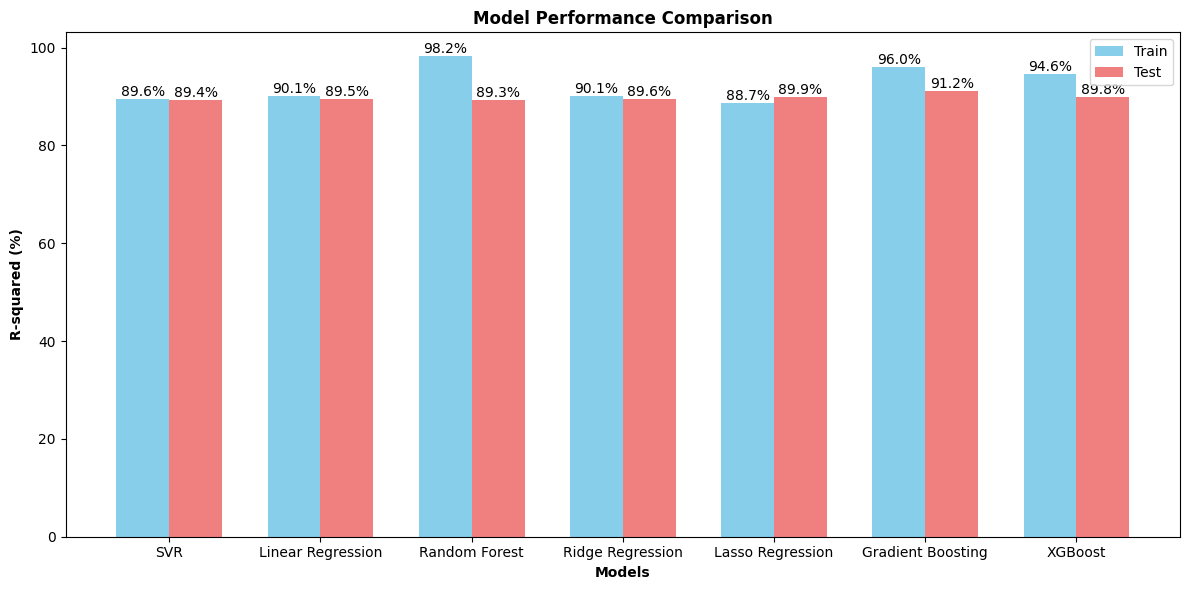

In [ ]:
# Example usage (assuming you have trained models):
models = {
    'SVR': svr_model,
    'Linear Regression': lr,
    'Random Forest': random_forest_model,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Gradient Boosting': gb_model,
     'XGBoost': xgb_model
}



comparison_plots(models, X_train, X_test, y_train, y_test)

In [ ]:
def comparison_plots(models, X_train, X_test, y_train, y_test):
    mse_train = {}
    rmse_train = {}
    mse_test = {}
    rmse_test = {}

    for model_name, model in models.items():
        y_train_pred = model.predict(X_train)
        mse_train[model_name] = mean_squared_error(y_train, y_train_pred)
        rmse_train[model_name] = np.sqrt(mse_train[model_name])

        y_test_pred = model.predict(X_test)
        mse_test[model_name] = mean_squared_error(y_test, y_test_pred)
        rmse_test[model_name] = np.sqrt(mse_test[model_name])

    # Create the bar plot for MSE
    plt.figure(figsize=(12, 6))
    barWidth = 0.35
    r1 = range(len(models))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, mse_train.values(), width=barWidth, color='skyblue', label='Train MSE')
    plt.bar(r2, mse_test.values(), width=barWidth, color='lightcoral', label='Test MSE')

    for i, v in enumerate(mse_train.values()):
        plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
    for i, v in enumerate(mse_test.values()):
        plt.text(i + barWidth, v, f"{v:.2f}", ha='center', va='bottom')

    plt.xlabel('Models', fontweight='bold')
    plt.ylabel('Mean Squared Error', fontweight='bold')
    plt.title('MSE Comparison', fontweight='bold')
    plt.xticks([r + barWidth/2 for r in range(len(models))], mse_train.keys())
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Create the bar plot for RMSE
    plt.figure(figsize=(12, 6))

    plt.bar(r1, rmse_train.values(), width=barWidth, color='skyblue', label='Train RMSE')
    plt.bar(r2, rmse_test.values(), width=barWidth, color='lightcoral', label='Test RMSE')

    for i, v in enumerate(rmse_train.values()):
        plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
    for i, v in enumerate(rmse_test.values()):
        plt.text(i + barWidth, v, f"{v:.2f}", ha='center', va='bottom')

    plt.xlabel('Models', fontweight='bold')
    plt.ylabel('Root Mean Squared Error', fontweight='bold')
    plt.title('RMSE Comparison', fontweight='bold')
    plt.xticks([r + barWidth/2 for r in range(len(models))], rmse_train.keys())
    plt.legend()
    plt.tight_layout()
    plt.show()


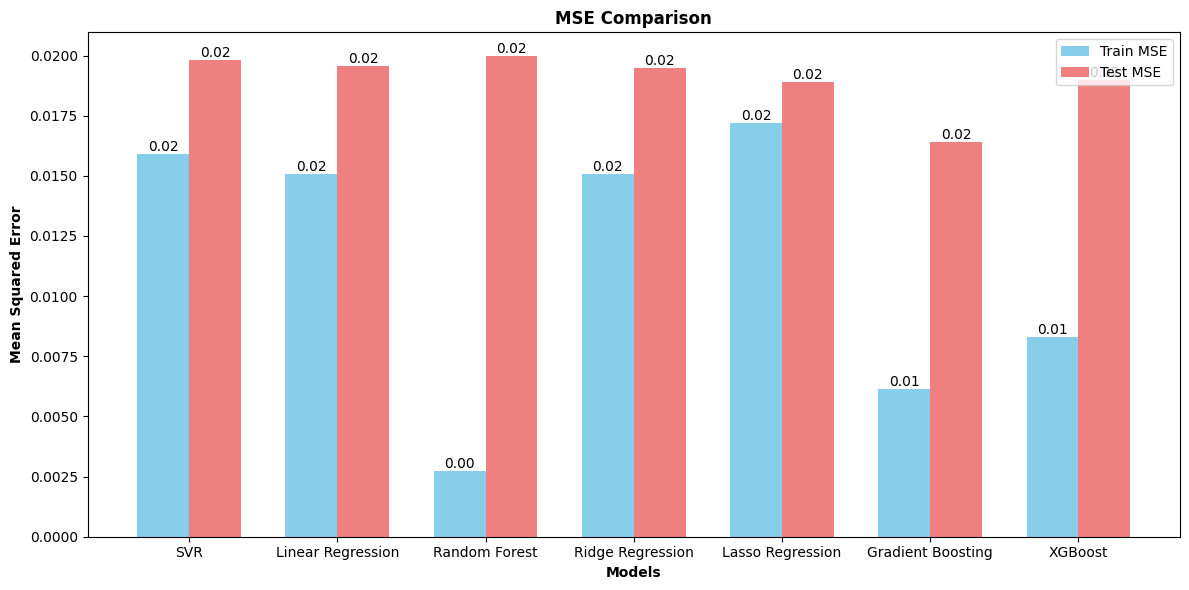

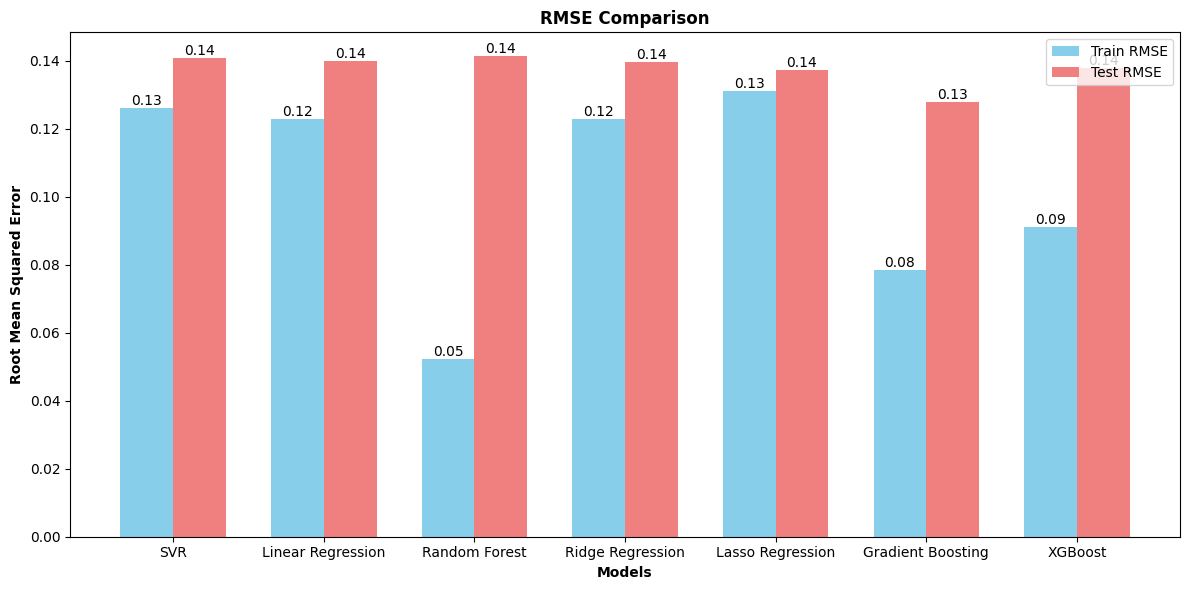

In [ ]:
# Example usage (assuming you have trained models in the 'models' dictionary):
comparison_plots(models, X_train, X_test, y_train, y_test)

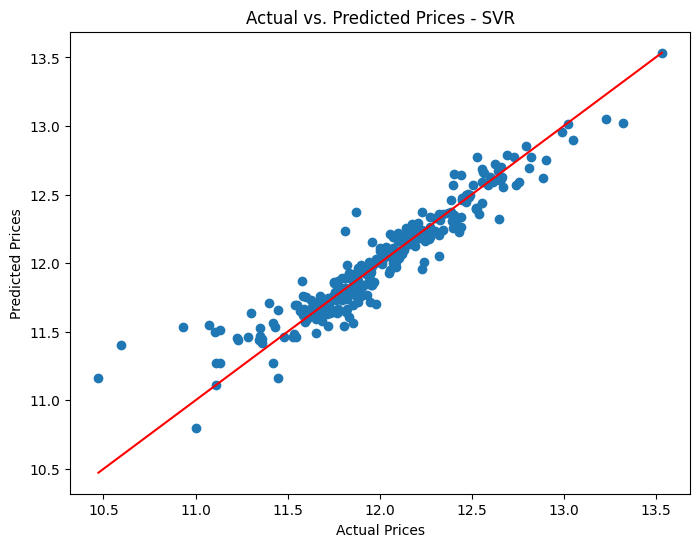

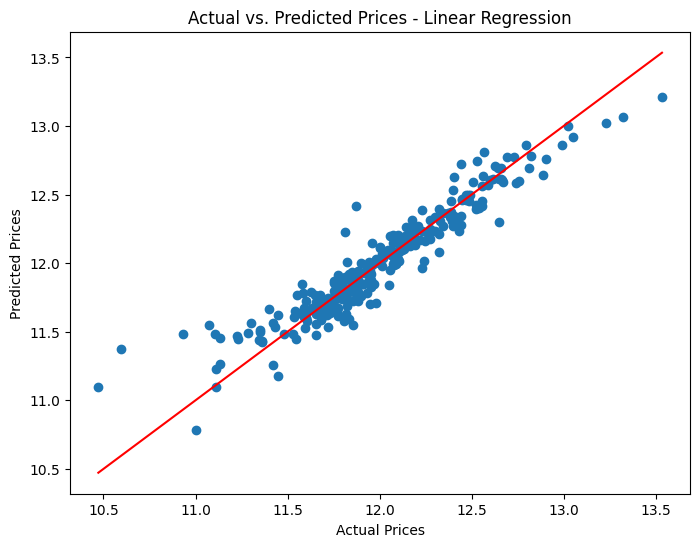

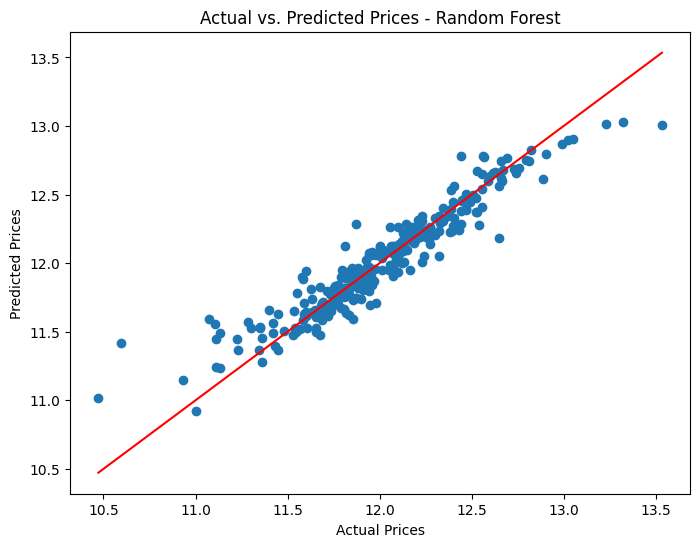

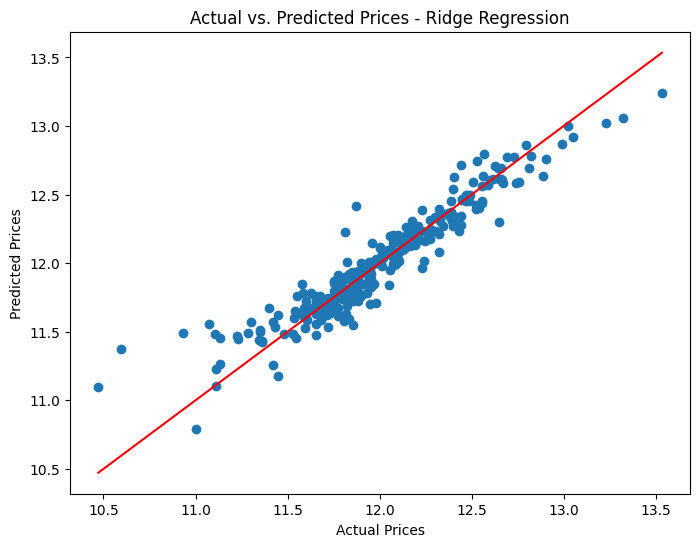

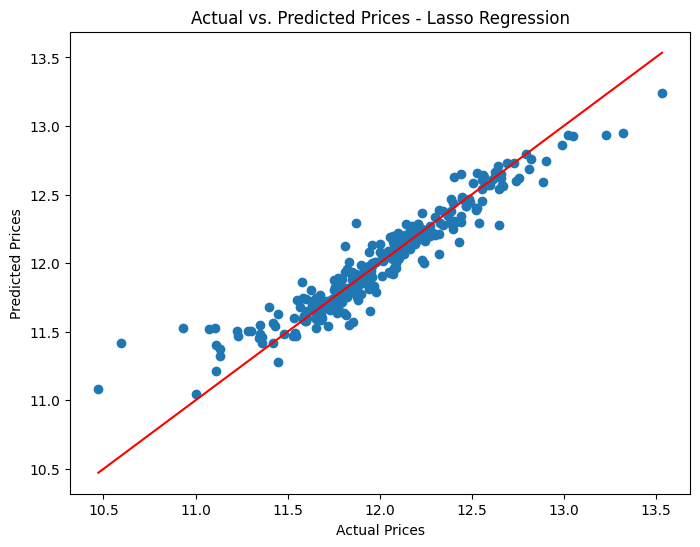

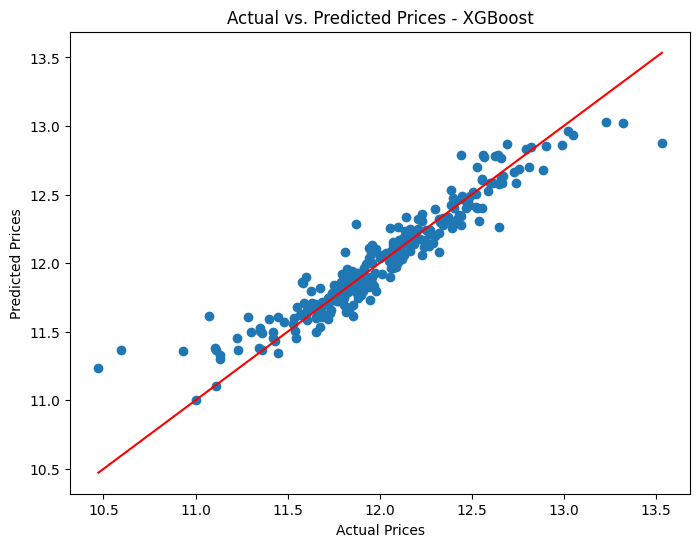

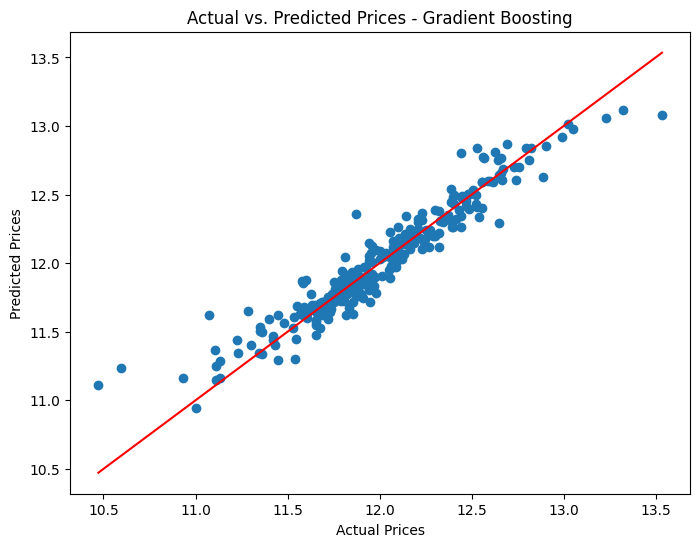

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Actual vs. Predicted Prices - {model_name}")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Add a diagonal line
    plt.show()

# Example usage for each model:
plot_predictions(svr_model, X_test, y_test, "SVR")
plot_predictions(lr, X_test, y_test, "Linear Regression")
plot_predictions(random_forest_model, X_test, y_test, "Random Forest")
plot_predictions(ridge, X_test, y_test, "Ridge Regression")
plot_predictions(lasso, X_test, y_test, "Lasso Regression")
plot_predictions(xgb_model, X_test, y_test, "XGBoost")
plot_predictions(gb_model, X_test, y_test, "Gradient Boosting")

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Define the models
models = {
    'SVR': svr_model,
    'Linear Regression': lr,
    'Random Forest': random_forest_model,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    # 'XGBoost': xgb_model,
    'Gradient Boosting': gb_model,
}

# Perform cross-validation for each model
results = {}
for model_name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results[model_name] = cv_scores

# Print the cross-validation results
for model_name, scores in results.items():
    print(f"{model_name} Cross-Validation Scores: {scores}")
    print(f"{model_name} Mean R^2 Score: {np.mean(scores)}")
    print(f"{model_name} Std Dev R^2 Score: {np.std(scores)}")

SVR Cross-Validation Scores: [0.90084135 0.86504231 0.8483786  0.91035322 0.91743874]
SVR Mean R^2 Score: 0.8884108428574141
SVR Std Dev R^2 Score: 0.02693426458981083
Linear Regression Cross-Validation Scores: [0.89438244 0.87105175 0.84586669 0.90199365 0.9109218 ]
Linear Regression Mean R^2 Score: 0.8848432677146294
Linear Regression Std Dev R^2 Score: 0.023556743458470603
Random Forest Cross-Validation Scores: [0.87122533 0.87218727 0.82648509 0.8822811  0.88994095]
Random Forest Mean R^2 Score: 0.8684239486574186
Random Forest Std Dev R^2 Score: 0.02207206547392167
Ridge Regression Cross-Validation Scores: [0.89559396 0.87184991 0.84756512 0.90254513 0.91220823]
Ridge Regression Mean R^2 Score: 0.8859524705807056
Ridge Regression Std Dev R^2 Score: 0.023367117163906152
Lasso Regression Cross-Validation Scores: [0.89114324 0.87505617 0.8465826  0.89043495 0.90504849]
Lasso Regression Mean R^2 Score: 0.8816530895075052
Lasso Regression Std Dev R^2 Score: 0.019939843916426312
Gradien

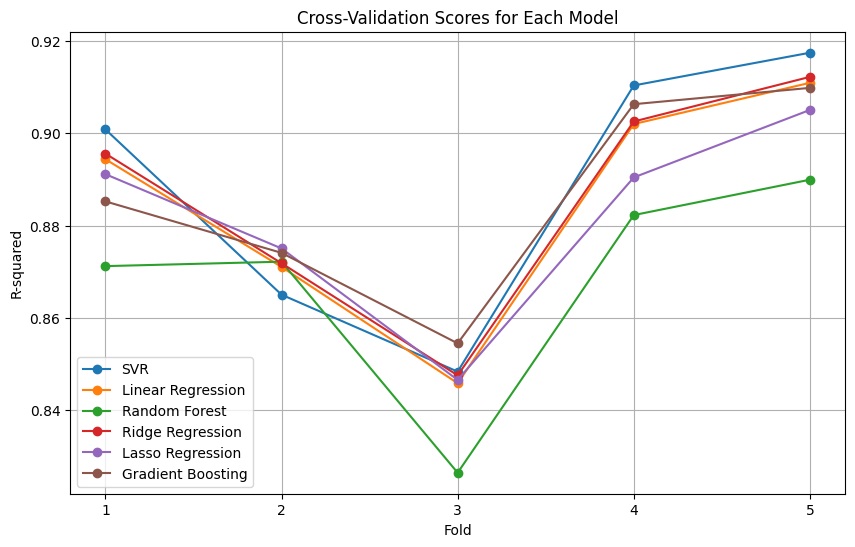

In [ ]:
def plot_cross_validation_results(results):
    plt.figure(figsize=(10, 6))

    for model_name, scores in results.items():
        plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', label=model_name)

    plt.title('Cross-Validation Scores for Each Model')
    plt.xlabel('Fold')
    plt.ylabel('R-squared')
    plt.xticks(range(1, len(scores) + 1))  # Assuming all models have the same number of folds
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage (assuming 'results' is defined as in your code):
plot_cross_validation_results(results)

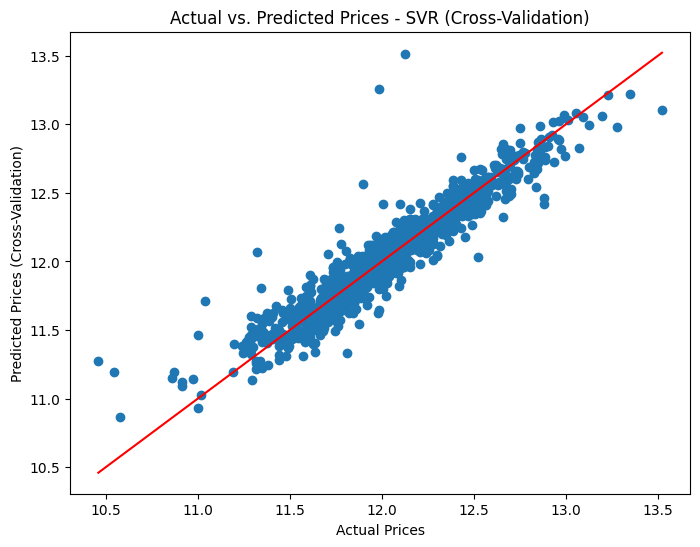

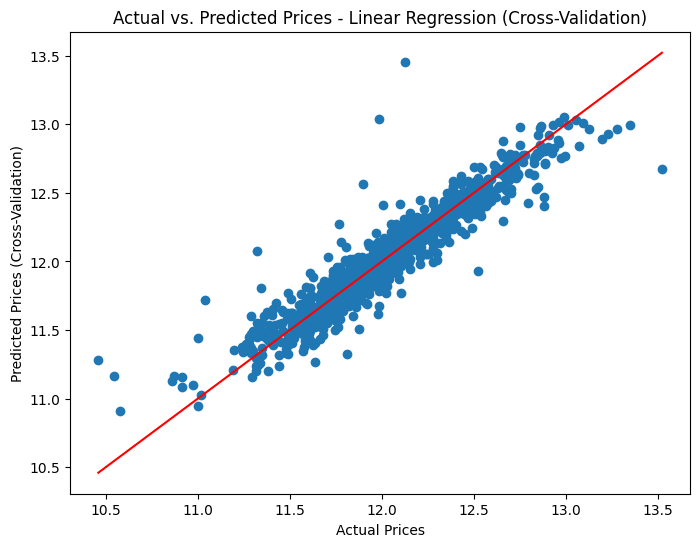

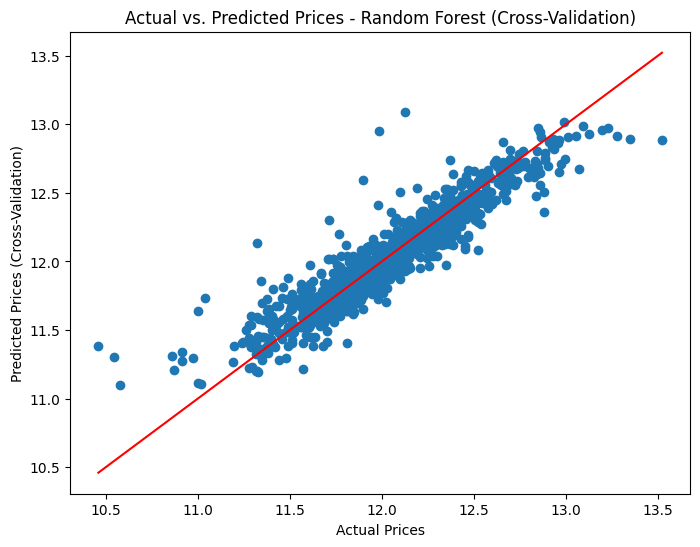

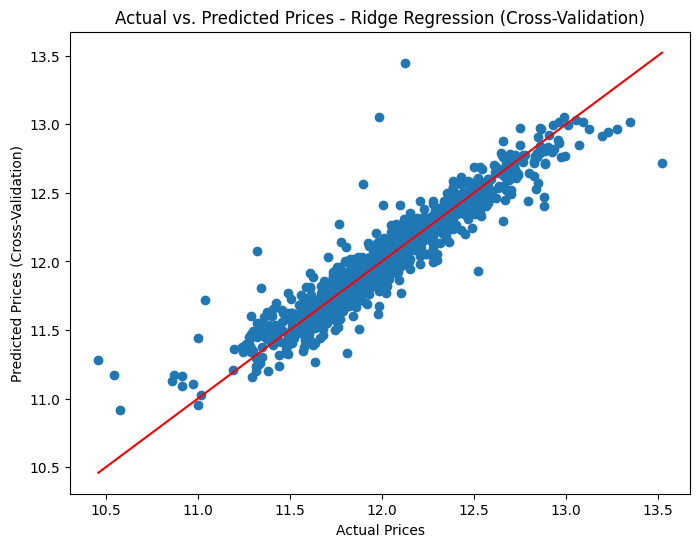

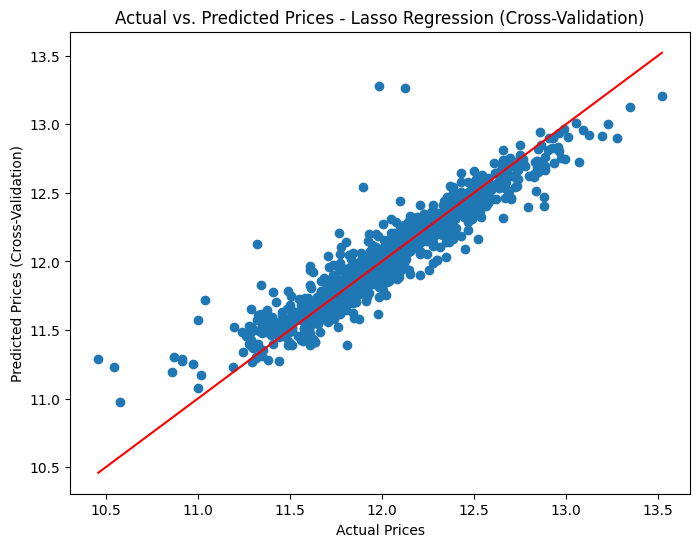

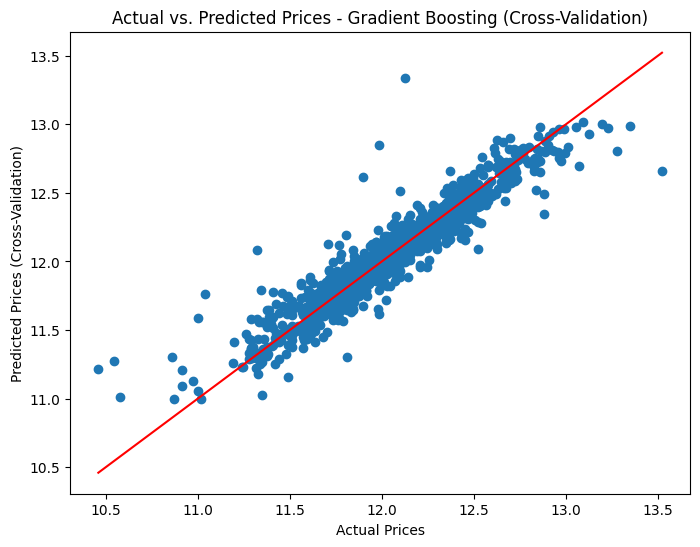

In [ ]:
import matplotlib.pyplot as plt

def plot_cv_predictions(model, X_train, y_train, cv):
    # Perform cross-validation predictions
    cv_predictions = cross_val_predict(model, X_train, y_train, cv=cv)

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, cv_predictions)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices (Cross-Validation)")
    plt.title(f"Actual vs. Predicted Prices - {model_name} (Cross-Validation)")
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Diagonal line
    plt.show()

from sklearn.model_selection import KFold, cross_val_predict
# Example usage for each model (assuming 'models' is defined):
for model_name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV
    plot_cv_predictions(model, X_train, y_train, kfold)

In [ ]:
df2.shape

(1459, 52)

In [ ]:
# prompt: create sample submision dataframe for df2 using svr model

# Assuming 'svr_model' is your trained SVR model and 'df2' is your test DataFrame
# Make predictions on df2 using the trained SVR model
y_pred_df2 = gb_model.predict(df2)

# Create a submission DataFrame
submission_df = pd.DataFrame({'Id': df2.index, 'SalePrice': y_pred_df2})

# Display the submission DataFrame
submission_df

Id  SalePrice
0     1461  11.790780
1     1462  11.868554
2     1463  12.010286
3     1464  12.071575
4     1465  12.161417
...    ...        ...
1454  2915  11.422778
1455  2916  11.429618
1456  2917  11.817713
1457  2918  11.715312
1458  2919  12.330334

[1459 rows x 2 columns]

In [ ]:
submission_df['SalePrice'] = np.expm1(submission_df['SalePrice'])
submission_df

Id      SalePrice
0     1461  132028.441935
1     1462  142706.742836
2     1463  164436.483048
3     1464  174829.909554
4     1465  191264.286767
...    ...            ...
1454  2915   91378.620963
1455  2916   92005.822347
1456  2917  135632.671725
1457  2918  122431.083660
1458  2919  226461.465017

[1459 rows x 2 columns]

In [ ]:
# prompt: convert submission_df to csv file

submission_df.to_csv('Submission(3).csv', index=False)


###Experments that turned out to be less acuracy

In [ ]:
# # Identify numerical columns with poor distribution (e.g., low variance or highly skewed) except SalePrice
# # Identify numerical columns with poor distribution (excluding 'SalePrice')
# poor_distribution_cols = []
# for col in numerical_columns:
#     if col != 'SalePrice':
#         variance = df[col].var()
#         skewness = df[col].skew()
#         if variance < 0.1 or abs(skewness) > 1 : # Define thresholds for poor distribution
#             poor_distribution_cols.append(col)

# print("Train Numerical columns with poor distribution (excluding 'SalePrice'):", poor_distribution_cols)

# test_poor_distribution_cols = []
# for col in numerical_columns:
#     if col != 'SalePrice':
#         variance = df2[col].var()
#         skewness = df2[col].skew()
#         if variance < 0.1 or abs(skewness) > 1 : # Define thresholds for poor distribution
#             test_poor_distribution_cols.append(col)

# print("Test Numerical columns with poor distribution (excluding 'SalePrice'):", test_poor_distribution_cols)

In [ ]:
# # Remove the poorly distributed columns from the DataFrame
# df = df.drop(columns=poor_distribution_cols)
# df2 = df2.drop(columns=test_poor_distribution_cols)

# print("DataFrame after removing poorly distributed columns:")
# df.head()

In [ ]:
# # Removing a feature with low variance or a single value
# for col in df.columns:
#     if df[col].dtype == 'object':  # Check for categorical columns
#         value_counts = df[col].value_counts()
#         # Example condition: remove if a single value represents more than 95%
#         if value_counts.iloc[0] / len(df) > 0.90:
#             print(f"Removing column '{col}' due to high dominance of a single value from train data.")
#             df = df.drop(col, axis=1)
#         # Example condition: remove if the number of unique values is less than a threshold
#         elif value_counts.shape[0] < 2: # Remove if only one unique value
#             print(f"Removing column '{col}' because it only has one unique value from train data.")
#             df = df.drop(col, axis = 1)

# for col in df2.columns:
#     if df2[col].dtype == 'object':  # Check for categorical columns
#         value_counts = df2[col].value_counts()
#         # Example condition: remove if a single value represents
#         if value_counts.iloc[0] / len(df2) > 0.90:
#             print(f"Removing column '{col}' due to high dominance of a single value from test data.")
#             df2 = df2.drop(col, axis=1)
#         # Example condition: remove if the number of unique values is less than a threshold
#         elif value_counts.shape[0] < 2: # Remove if only one unique value
#             print(f"Removing column '{col}' because it only has one unique value from test data.")

In [ ]:
# Fill missing values in 'GarageYrBlt' with the year the house was built ('YearBuilt')
# df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
# df2['GarageYrBlt'] = df2['GarageYrBlt'].fillna(df2['YearBuilt'])

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# # Define the columns to apply OneHotEncoding
# ohe_cols = ['Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
#             'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical', 'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

# # Check if all columns in 'ohe_cols' exist in df and df2
# missing_cols_df = [col for col in ohe_cols if col not in df.columns]
# missing_cols_df2 = [col for col in ohe_cols if col not in df2.columns]

# # If any columns are missing in df or df2, print a warning
# if missing_cols_df:
#     print(f"Warning: These columns are missing in df: {missing_cols_df}")

# if missing_cols_df2:
#     print(f"Warning: These columns are missing in df2: {missing_cols_df2}")

# # Drop the missing columns from both df and df2 (if any)
# df = df.drop(columns=missing_cols_df, errors='ignore')
# df2 = df2.drop(columns=missing_cols_df2, errors='ignore')

# # Handle missing values in df2 before encoding
# df2[ohe_cols] = df2[ohe_cols].fillna('Unknown')  # Fill missing values with a placeholder

# # Apply OneHotEncoder to both df and df2
# encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # 'handle_unknown' to handle missing categories in df2

# # Fit and transform df
# df_encoded = encoder.fit_transform(df[ohe_cols])

# # Transform df2 (using the same encoder)
# df2_encoded = encoder.transform(df2[ohe_cols])

# # Convert the results into DataFrames with appropriate column names
# df_encoded_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(ohe_cols))
# df2_encoded_df = pd.DataFrame(df2_encoded, columns=encoder.get_feature_names_out(ohe_cols))

# # Concatenate the encoded columns back into the original DataFrames
# df = pd.concat([df, df_encoded_df], axis=1).drop(columns=ohe_cols)
# df2 = pd.concat([df2, df2_encoded_df], axis=1).drop(columns=ohe_cols)

# # Display the first few rows of the transformed DataFrames
# print(df.head())
# print(df2.head())


In [ ]:
# # Use the same ohe object that was fitted on the training data
# test_encoded_features = ohe.transform(df2[ohe_cols])

# # Create a new DataFrame from the encoded features
# test_encoded_df = pd.DataFrame(test_encoded_features, columns=ohe.get_feature_names_out(ohe_cols))

# # Concatenate the encoded features with the original DataFrame
# df2 = pd.concat([df2, test_encoded_df], axis=1)

# # Drop the original categorical columns
# df2 = df2.drop(columns=ohe_cols)

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.metrics import mean_squared_error, r2_score
# # Initialize SVR model
# rf_model = RandomForestRegressor(n_estimators=100)
# rfe = RFE(estimator=rf_model, n_features_to_select=80)
# X_train_rfe = rfe.fit_transform(X_train, y_train)
# X_test_rfe = rfe.transform(X_test)


In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.decomposition import PCA
# # Set n_components to a value less than or equal to the number of features (13 in this case)
# pca = PCA(n_components=80)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

In [ ]:
# df_svr = df.copy()
# df_svr['SalePrice'] = np.log1p(df_svr['SalePrice'])